In [1]:
%%time
import vaex
import pandas as pd
import numpy as np


CPU times: total: 1.23 s
Wall time: 5.89 s


# Sampling Healthkathon

Sampling_Healthkathon, merupakan data kunjungan peserta JKN ke fasilitas kesehatan rujukan tingkat lanjut

In [3]:
%%time

df = vaex.from_csv('sampling_healtkathon2022.csv', convert=True, chunk_size=100_000)

CPU times: total: 828 ms
Wall time: 1.82 s


In [4]:
df

#,id,id_peserta,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,politujuan,diagfktp,biaya,jenispulang,cbg,kelasrawat,kdsa,kdsp,kdsr,kdsi,kdsd,label
0,165666,486,17,KL,48,P,1.0,2018-07-25T17:00:00.000Z,2018-07-25T17:00:00.000Z,2,THT,L02.8,184300.0,1.0,Q-5-42-0,3,--,--,--,--,--,0
1,1010828,520,17,A,63,L,1.0,2019-05-27T17:00:00.000Z,2019-05-30T17:00:00.000Z,1,--,R23.1,10628400.0,1.0,D-4-13-III,1,--,--,--,--,--,0
2,166042,523,17,KL,53,P,1.0,2019-07-16T17:00:00.000Z,2019-07-16T17:00:00.000Z,2,INT,E10.5,187300.0,1.0,Q-5-44-0,3,--,--,--,--,--,0
3,168937,549,17,KL,54,P,1.0,2019-10-17T17:00:00.000Z,2019-10-17T17:00:00.000Z,2,MAT,H54.2,187300.0,1.0,Q-5-44-0,3,--,--,--,--,--,0
4,1005899,549,17,A,53,P,1.0,2018-04-18T17:00:00.000Z,2018-04-18T17:00:00.000Z,2,SAR,M54.5,381600.0,1.0,Q-5-44-0,3,--,--,--,--,--,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"11,401,877",9983563,8527704,301,B,0,P,4.0,2020-12-30T17:00:00.000Z,2021-01-03T17:00:00.000Z,1,--,Z71.8,3645100.0,1.0,P-8-17-I,3,nan,nan,nan,nan,nan,0
"11,401,878",11053870,8527709,233,A,0,P,4.0,2020-12-30T17:00:00.000Z,2021-01-03T17:00:00.000Z,1,--,P59.9,12273200.0,1.0,P-8-13-II,2,nan,nan,nan,nan,nan,0
"11,401,879",7461049,8527751,118,B,0,L,4.0,2020-12-30T17:00:00.000Z,2021-01-06T17:00:00.000Z,1,--,P24.8,4099000.0,1.0,P-8-08-I,3,nan,nan,nan,nan,nan,0
"11,401,880",1075162,8527853,101,SC,0,L,5.0,2020-12-29T17:00:00.000Z,2020-12-31T17:00:00.000Z,1,--,P03,3992400.0,1.0,P-8-08-I,3,nan,nan,nan,nan,nan,0


### Cek Data

In [ ]:
df[df['politujuan'].isna()].head(10)


#,id,id_peserta,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,politujuan,diagfktp,biaya,jenispulang,cbg,kelasrawat,kdsa,kdsp,kdsr,kdsi,kdsd,label
0,1010828,520,17,A,63,L,1,2019-05-27T17:00:00.000Z,2019-05-30T17:00:00.000Z,1,--,R23.1,1.06284e+07,1,D-4-13-III,1,--,--,--,--,--,0
1,1025249,663,17,A,49,P,1,2018-10-06T17:00:00.000Z,2018-10-14T17:00:00.000Z,1,--,K28.0,8.3097e+06,1,D-4-13-II,1,--,--,--,--,--,0
2,176799,739,19,C,61,L,1,2020-09-28T17:00:00.000Z,2020-10-01T17:00:00.000Z,1,--,M06.0,2.9326e+06,1,M-4-18-I,1,--,--,--,--,--,0
3,1011990,1701,17,A,23,L,1,2018-06-14T17:00:00.000Z,2018-06-27T17:00:00.000Z,1,--,C91.0,5.6761e+06,1,D-4-11-I,3,--,--,--,--,--,0
4,1011268,1785,17,A,91,L,1,2020-05-18T17:00:00.000Z,2020-06-05T17:00:00.000Z,1,--,K83.1,1.4927e+07,4,B-1-12-II,1,--,--,--,--,--,0
5,1060552,1870,17,SC,33,P,3,2019-01-06T17:00:00.000Z,2019-01-08T17:00:00.000Z,1,--,O80.9,2.2544e+06,1,O-6-13-I,1,--,--,--,--,--,0
6,1035370,2006,17,SC,42,P,1,2020-06-27T17:00:00.000Z,2020-06-29T17:00:00.000Z,1,--,A88.1,1.9142e+06,1,U-4-11-I,1,--,--,--,--,--,0
7,135750,2091,13,SD,68,P,3,2020-01-19T17:00:00.000Z,2020-01-24T17:00:00.000Z,1,--,R07.4,1.9887e+06,1,I-4-16-I,1,--,--,--,--,--,0
8,1048459,2305,17,B,63,P,3,2019-01-21T17:00:00.000Z,2019-01-22T17:00:00.000Z,1,--,M54.5,4.419e+06,1,G-4-17-I,3,--,--,--,--,--,0
9,1048540,2305,17,B,63,P,3,2019-01-28T17:00:00.000Z,2019-01-29T17:00:00.000Z,1,--,M54.52,3.6234e+06,1,M-4-17-I,3,--,--,--,--,--,0


In [ ]:
%%time

df_pandas = pd.read_csv('sampling_healtkathon2022.csv', chunksize=100_000)
df_pandas = pd.concat(df_pandas, ignore_index=True)

df_pandas

In [5]:
df.head(5)

#,id,id_peserta,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,politujuan,diagfktp,biaya,jenispulang,cbg,kelasrawat,kdsa,kdsp,kdsr,kdsi,kdsd,label
0,165666,486,17,KL,48,P,1,2018-07-25T17:00:00.000Z,2018-07-25T17:00:00.000Z,2,THT,L02.8,184300,1,Q-5-42-0,3,--,--,--,--,--,0
1,1010828,520,17,A,63,L,1,2019-05-27T17:00:00.000Z,2019-05-30T17:00:00.000Z,1,--,R23.1,1.06284e+07,1,D-4-13-III,1,--,--,--,--,--,0
2,166042,523,17,KL,53,P,1,2019-07-16T17:00:00.000Z,2019-07-16T17:00:00.000Z,2,INT,E10.5,187300,1,Q-5-44-0,3,--,--,--,--,--,0
3,168937,549,17,KL,54,P,1,2019-10-17T17:00:00.000Z,2019-10-17T17:00:00.000Z,2,MAT,H54.2,187300,1,Q-5-44-0,3,--,--,--,--,--,0
4,1005899,549,17,A,53,P,1,2018-04-18T17:00:00.000Z,2018-04-18T17:00:00.000Z,2,SAR,M54.5,381600,1,Q-5-44-0,3,--,--,--,--,--,0


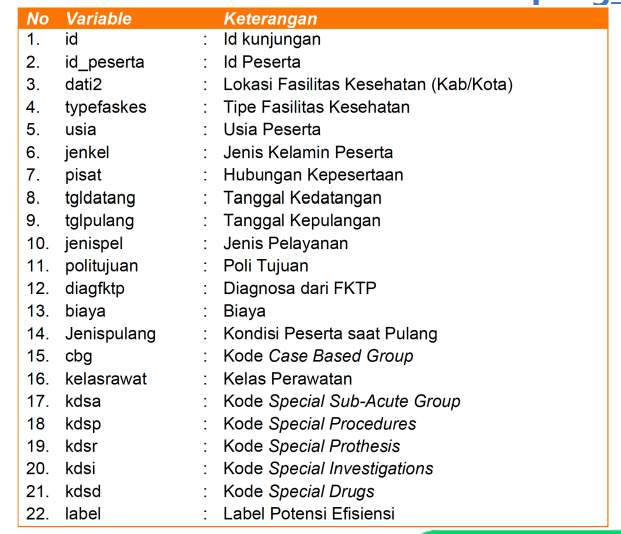

In [6]:
df.describe()

,id,id_peserta,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,...,biaya,jenispulang,cbg,kelasrawat,kdsa,kdsp,kdsr,kdsi,kdsd,label
data_type,int64,int64,int64,string,int64,string,float64,string,string,int64,...,float64,float64,string,int64,string,string,string,string,string,int64
count,11401882,11401882,11401882,11401882,11401882,11401833,11401692,11401882,11401882,11401882,...,11344067,11401843,11401882,11401882,14883,74517,8538,11359,154090,11401882
NA,0,0,0,0,0,49,190,0,0,0,...,57815,39,0,0,11386999,11327365,11393344,11390523,11247792,0
mean,5712719.902465224,4199294.393911374,182.5299193589269,--,37.056899992474925,--,2.498203512250638,--,--,1.6455437795269237,...,2146848.771842938,1.0945962858811509,--,2.7846950178926604,--,--,--,--,--,0.013759921388416403
std,3298534.717968,2436248.842344,106.135201,--,22.921875,--,1.390863,--,--,0.478348,...,5207576.726626,0.513155,--,0.551147,--,--,--,--,--,0.116493
min,1,1,1,--,0,--,1.0,--,--,1,...,0.0,1.0,--,1,--,--,--,--,--,0
max,11426957,8527919,528,--,110,--,5.0,--,--,2,...,401696600.0,5.0,--,3,--,--,--,--,--,1


### Menghitung Nilai Entropy Setiap Kolom

In [8]:
def entropy(df, column):
    counts = df[column].value_counts()
    total = counts.sum().item()
    probs = counts / total
    entropy = -np.sum(probs * np.log2(probs))
    return entropy

#### Kolom Kategorikal

In [9]:
%%time 
categorical_columns = [col for col in df.get_column_names() if df[col].dtype == 'string']

for col in categorical_columns:
    ent = entropy(df, col)
    print(f'Entropy kolom {col}: {ent:.4f}')


Entropy kolom typefaskes: 3.1333
Entropy kolom jenkel: 0.9954
Entropy kolom tgldatang: 9.9779
Entropy kolom tglpulang: 9.9899
Entropy kolom politujuan: 3.5416
Entropy kolom diagfktp: 9.6536
Entropy kolom cbg: 6.1496
Entropy kolom kdsa: 0.0181
Entropy kolom kdsp: 0.0675
Entropy kolom kdsr: 0.0097
Entropy kolom kdsi: 0.0121
Entropy kolom kdsd: 0.1362
CPU times: total: 31.5 s
Wall time: 4.83 s


#### Kolom Numerikal

In [34]:
%%time
def entropy_numerical(df, columns, bins=6):
    entropies = {}
    for col in columns:
        try:
            data = df[col].to_numpy()
            counts, _ = np.histogram(data, bins=bins)
            probs = counts / counts.sum()
            entropy = -np.sum([p * np.log2(p) for p in probs if p > 0])
            entropies[col] = entropy
        except Exception as e:
            entropies[col] = f"Error: {str(e)}"
    return entropies


CPU times: total: 0 ns
Wall time: 0 ns


### Drop Column

In [4]:
%%time

df = df.drop(['id_peserta', 'kdsa', 'kdsp', 'kdsr', 'kdsi', 'kdsd'])


CPU times: total: 0 ns
Wall time: 0 ns


In [11]:
df.describe()

,id,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,politujuan,diagfktp,biaya,jenispulang,cbg,kelasrawat,label
data_type,int64,int64,string,int64,string,float64,string,string,int64,string,string,float64,float64,string,int64,int64
count,11401882,11401882,11401882,11401882,11401833,11401692,11401882,11401882,11401882,7360427,11399352,11344067,11401843,11401882,11401882,11401882
NA,0,0,0,0,49,190,0,0,0,4041455,2530,57815,39,0,0,0
mean,5712719.902465224,182.5299193589269,--,37.056899992474925,--,2.498203512250638,--,--,1.6455437795269237,--,--,2146848.771842938,1.0945962858811509,--,2.7846950178926604,0.013759921388416403
std,3298534.717968,106.135201,--,22.921875,--,1.390863,--,--,0.478348,--,--,5207576.726626,0.513155,--,0.551147,0.116493
min,1,1,--,0,--,1.0,--,--,1,--,--,0.0,1.0,--,1,0
max,11426957,528,--,110,--,5.0,--,--,2,--,--,401696600.0,5.0,--,3,1


Kolom yang perlu diperhatikan data kosongnya:
- Poli Tujuan
- Biaya
- diagfktp


In [12]:
df

#,id,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,politujuan,diagfktp,biaya,jenispulang,cbg,kelasrawat,label
0,165666,17,KL,48,P,1.0,2018-07-25T17:00:00.000Z,2018-07-25T17:00:00.000Z,2,THT,L02.8,184300.0,1.0,Q-5-42-0,3,0
1,1010828,17,A,63,L,1.0,2019-05-27T17:00:00.000Z,2019-05-30T17:00:00.000Z,1,--,R23.1,10628400.0,1.0,D-4-13-III,1,0
2,166042,17,KL,53,P,1.0,2019-07-16T17:00:00.000Z,2019-07-16T17:00:00.000Z,2,INT,E10.5,187300.0,1.0,Q-5-44-0,3,0
3,168937,17,KL,54,P,1.0,2019-10-17T17:00:00.000Z,2019-10-17T17:00:00.000Z,2,MAT,H54.2,187300.0,1.0,Q-5-44-0,3,0
4,1005899,17,A,53,P,1.0,2018-04-18T17:00:00.000Z,2018-04-18T17:00:00.000Z,2,SAR,M54.5,381600.0,1.0,Q-5-44-0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"11,401,877",9983563,301,B,0,P,4.0,2020-12-30T17:00:00.000Z,2021-01-03T17:00:00.000Z,1,--,Z71.8,3645100.0,1.0,P-8-17-I,3,0
"11,401,878",11053870,233,A,0,P,4.0,2020-12-30T17:00:00.000Z,2021-01-03T17:00:00.000Z,1,--,P59.9,12273200.0,1.0,P-8-13-II,2,0
"11,401,879",7461049,118,B,0,L,4.0,2020-12-30T17:00:00.000Z,2021-01-06T17:00:00.000Z,1,--,P24.8,4099000.0,1.0,P-8-08-I,3,0
"11,401,880",1075162,101,SC,0,L,5.0,2020-12-29T17:00:00.000Z,2020-12-31T17:00:00.000Z,1,--,P03,3992400.0,1.0,P-8-08-I,3,0


### Membuat Kolom Lama Perawatan

In [5]:
df['tgl_datang_clean'] = df['tgldatang'].str.replace('Z', '')
df['tgl_pulang_clean'] = df['tglpulang'].str.replace('Z', '')
df

#,id,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,politujuan,diagfktp,biaya,jenispulang,cbg,kelasrawat,label,tgl_datang_clean,tgl_pulang_clean
0,165666,17,KL,48,P,1.0,2018-07-25T17:00:00.000Z,2018-07-25T17:00:00.000Z,2,THT,L02.8,184300.0,1.0,Q-5-42-0,3,0,2018-07-25T17:00:00.000,2018-07-25T17:00:00.000
1,1010828,17,A,63,L,1.0,2019-05-27T17:00:00.000Z,2019-05-30T17:00:00.000Z,1,--,R23.1,10628400.0,1.0,D-4-13-III,1,0,2019-05-27T17:00:00.000,2019-05-30T17:00:00.000
2,166042,17,KL,53,P,1.0,2019-07-16T17:00:00.000Z,2019-07-16T17:00:00.000Z,2,INT,E10.5,187300.0,1.0,Q-5-44-0,3,0,2019-07-16T17:00:00.000,2019-07-16T17:00:00.000
3,168937,17,KL,54,P,1.0,2019-10-17T17:00:00.000Z,2019-10-17T17:00:00.000Z,2,MAT,H54.2,187300.0,1.0,Q-5-44-0,3,0,2019-10-17T17:00:00.000,2019-10-17T17:00:00.000
4,1005899,17,A,53,P,1.0,2018-04-18T17:00:00.000Z,2018-04-18T17:00:00.000Z,2,SAR,M54.5,381600.0,1.0,Q-5-44-0,3,0,2018-04-18T17:00:00.000,2018-04-18T17:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"11,401,877",9983563,301,B,0,P,4.0,2020-12-30T17:00:00.000Z,2021-01-03T17:00:00.000Z,1,--,Z71.8,3645100.0,1.0,P-8-17-I,3,0,2020-12-30T17:00:00.000,2021-01-03T17:00:00.000
"11,401,878",11053870,233,A,0,P,4.0,2020-12-30T17:00:00.000Z,2021-01-03T17:00:00.000Z,1,--,P59.9,12273200.0,1.0,P-8-13-II,2,0,2020-12-30T17:00:00.000,2021-01-03T17:00:00.000
"11,401,879",7461049,118,B,0,L,4.0,2020-12-30T17:00:00.000Z,2021-01-06T17:00:00.000Z,1,--,P24.8,4099000.0,1.0,P-8-08-I,3,0,2020-12-30T17:00:00.000,2021-01-06T17:00:00.000
"11,401,880",1075162,101,SC,0,L,5.0,2020-12-29T17:00:00.000Z,2020-12-31T17:00:00.000Z,1,--,P03,3992400.0,1.0,P-8-08-I,3,0,2020-12-29T17:00:00.000,2020-12-31T17:00:00.000


In [6]:
df['datang_dt'] = df['tgl_datang_clean'].astype('datetime64[ns]')
df['pulang_dt'] = df['tgl_pulang_clean'].astype('datetime64[ns]')
df

#,id,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,politujuan,diagfktp,biaya,jenispulang,cbg,kelasrawat,label,tgl_datang_clean,tgl_pulang_clean,datang_dt,pulang_dt
0,165666,17,KL,48,P,1.0,2018-07-25T17:00:00.000Z,2018-07-25T17:00:00.000Z,2,THT,L02.8,184300.0,1.0,Q-5-42-0,3,0,2018-07-25T17:00:00.000,2018-07-25T17:00:00.000,2018-07-25 17:00:00,2018-07-25 17:00:00
1,1010828,17,A,63,L,1.0,2019-05-27T17:00:00.000Z,2019-05-30T17:00:00.000Z,1,--,R23.1,10628400.0,1.0,D-4-13-III,1,0,2019-05-27T17:00:00.000,2019-05-30T17:00:00.000,2019-05-27 17:00:00,2019-05-30 17:00:00
2,166042,17,KL,53,P,1.0,2019-07-16T17:00:00.000Z,2019-07-16T17:00:00.000Z,2,INT,E10.5,187300.0,1.0,Q-5-44-0,3,0,2019-07-16T17:00:00.000,2019-07-16T17:00:00.000,2019-07-16 17:00:00,2019-07-16 17:00:00
3,168937,17,KL,54,P,1.0,2019-10-17T17:00:00.000Z,2019-10-17T17:00:00.000Z,2,MAT,H54.2,187300.0,1.0,Q-5-44-0,3,0,2019-10-17T17:00:00.000,2019-10-17T17:00:00.000,2019-10-17 17:00:00,2019-10-17 17:00:00
4,1005899,17,A,53,P,1.0,2018-04-18T17:00:00.000Z,2018-04-18T17:00:00.000Z,2,SAR,M54.5,381600.0,1.0,Q-5-44-0,3,0,2018-04-18T17:00:00.000,2018-04-18T17:00:00.000,2018-04-18 17:00:00,2018-04-18 17:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"11,401,877",9983563,301,B,0,P,4.0,2020-12-30T17:00:00.000Z,2021-01-03T17:00:00.000Z,1,--,Z71.8,3645100.0,1.0,P-8-17-I,3,0,2020-12-30T17:00:00.000,2021-01-03T17:00:00.000,2020-12-30 17:00:00,2021-01-03 17:00:00
"11,401,878",11053870,233,A,0,P,4.0,2020-12-30T17:00:00.000Z,2021-01-03T17:00:00.000Z,1,--,P59.9,12273200.0,1.0,P-8-13-II,2,0,2020-12-30T17:00:00.000,2021-01-03T17:00:00.000,2020-12-30 17:00:00,2021-01-03 17:00:00
"11,401,879",7461049,118,B,0,L,4.0,2020-12-30T17:00:00.000Z,2021-01-06T17:00:00.000Z,1,--,P24.8,4099000.0,1.0,P-8-08-I,3,0,2020-12-30T17:00:00.000,2021-01-06T17:00:00.000,2020-12-30 17:00:00,2021-01-06 17:00:00
"11,401,880",1075162,101,SC,0,L,5.0,2020-12-29T17:00:00.000Z,2020-12-31T17:00:00.000Z,1,--,P03,3992400.0,1.0,P-8-08-I,3,0,2020-12-29T17:00:00.000,2020-12-31T17:00:00.000,2020-12-29 17:00:00,2020-12-31 17:00:00


In [7]:
df['durasi_rawat'] = (df['pulang_dt'] - df['datang_dt']).astype('timedelta64[D]').astype('int')
df

#,id,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,politujuan,diagfktp,biaya,jenispulang,cbg,kelasrawat,label,tgl_datang_clean,tgl_pulang_clean,datang_dt,pulang_dt,durasi_rawat
0,165666,17,KL,48,P,1.0,2018-07-25T17:00:00.000Z,2018-07-25T17:00:00.000Z,2,THT,L02.8,184300.0,1.0,Q-5-42-0,3,0,2018-07-25T17:00:00.000,2018-07-25T17:00:00.000,2018-07-25 17:00:00,2018-07-25 17:00:00,0
1,1010828,17,A,63,L,1.0,2019-05-27T17:00:00.000Z,2019-05-30T17:00:00.000Z,1,--,R23.1,10628400.0,1.0,D-4-13-III,1,0,2019-05-27T17:00:00.000,2019-05-30T17:00:00.000,2019-05-27 17:00:00,2019-05-30 17:00:00,3
2,166042,17,KL,53,P,1.0,2019-07-16T17:00:00.000Z,2019-07-16T17:00:00.000Z,2,INT,E10.5,187300.0,1.0,Q-5-44-0,3,0,2019-07-16T17:00:00.000,2019-07-16T17:00:00.000,2019-07-16 17:00:00,2019-07-16 17:00:00,0
3,168937,17,KL,54,P,1.0,2019-10-17T17:00:00.000Z,2019-10-17T17:00:00.000Z,2,MAT,H54.2,187300.0,1.0,Q-5-44-0,3,0,2019-10-17T17:00:00.000,2019-10-17T17:00:00.000,2019-10-17 17:00:00,2019-10-17 17:00:00,0
4,1005899,17,A,53,P,1.0,2018-04-18T17:00:00.000Z,2018-04-18T17:00:00.000Z,2,SAR,M54.5,381600.0,1.0,Q-5-44-0,3,0,2018-04-18T17:00:00.000,2018-04-18T17:00:00.000,2018-04-18 17:00:00,2018-04-18 17:00:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"11,401,877",9983563,301,B,0,P,4.0,2020-12-30T17:00:00.000Z,2021-01-03T17:00:00.000Z,1,--,Z71.8,3645100.0,1.0,P-8-17-I,3,0,2020-12-30T17:00:00.000,2021-01-03T17:00:00.000,2020-12-30 17:00:00,2021-01-03 17:00:00,4
"11,401,878",11053870,233,A,0,P,4.0,2020-12-30T17:00:00.000Z,2021-01-03T17:00:00.000Z,1,--,P59.9,12273200.0,1.0,P-8-13-II,2,0,2020-12-30T17:00:00.000,2021-01-03T17:00:00.000,2020-12-30 17:00:00,2021-01-03 17:00:00,4
"11,401,879",7461049,118,B,0,L,4.0,2020-12-30T17:00:00.000Z,2021-01-06T17:00:00.000Z,1,--,P24.8,4099000.0,1.0,P-8-08-I,3,0,2020-12-30T17:00:00.000,2021-01-06T17:00:00.000,2020-12-30 17:00:00,2021-01-06 17:00:00,7
"11,401,880",1075162,101,SC,0,L,5.0,2020-12-29T17:00:00.000Z,2020-12-31T17:00:00.000Z,1,--,P03,3992400.0,1.0,P-8-08-I,3,0,2020-12-29T17:00:00.000,2020-12-31T17:00:00.000,2020-12-29 17:00:00,2020-12-31 17:00:00,2


In [16]:
df.info()

column,type,unit,description,expression
id,int64,,,
dati2,int64,,,
typefaskes,str,,,
usia,int64,,,
jenkel,str,,,
pisat,float64,,,
tgldatang,str,,,
tglpulang,str,,,
jenispel,int64,,,
politujuan,str,,,


In [30]:
df[df['durasi_rawat'] == 1431].head(10)


#,id,dati2,typefaskes,usia,jenkel,pisat,tgldatang,tglpulang,jenispel,politujuan,diagfktp,biaya,jenispulang,cbg,kelasrawat,label,tgl_datang_clean,tgl_pulang_clean,datang_dt,pulang_dt,durasi_rawat
0,30308,6,B,15,L,4,2018-02-09T17:00:00.000Z,2022-01-10T17:00:00.000Z,1,--,M48.46,4.0542e+06,1,M-4-12-I,1,0,2018-02-09T17:00:00.000,2022-01-10T17:00:00.000,2018-02-09 17:00:00,2022-01-10 17:00:00,1431


In [8]:
%%time
df = df.drop(['tgldatang', 'tglpulang', 'tgl_datang_clean', 'tgl_pulang_clean', 'datang_dt', 'pulang_dt'])

CPU times: total: 0 ns
Wall time: 1.99 ms


In [18]:
df

#,id,dati2,typefaskes,usia,jenkel,pisat,jenispel,politujuan,diagfktp,biaya,jenispulang,cbg,kelasrawat,label,durasi_rawat
0,165666,17,KL,48,P,1.0,2,THT,L02.8,184300.0,1.0,Q-5-42-0,3,0,0
1,1010828,17,A,63,L,1.0,1,--,R23.1,10628400.0,1.0,D-4-13-III,1,0,3
2,166042,17,KL,53,P,1.0,2,INT,E10.5,187300.0,1.0,Q-5-44-0,3,0,0
3,168937,17,KL,54,P,1.0,2,MAT,H54.2,187300.0,1.0,Q-5-44-0,3,0,0
4,1005899,17,A,53,P,1.0,2,SAR,M54.5,381600.0,1.0,Q-5-44-0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"11,401,877",9983563,301,B,0,P,4.0,1,--,Z71.8,3645100.0,1.0,P-8-17-I,3,0,4
"11,401,878",11053870,233,A,0,P,4.0,1,--,P59.9,12273200.0,1.0,P-8-13-II,2,0,4
"11,401,879",7461049,118,B,0,L,4.0,1,--,P24.8,4099000.0,1.0,P-8-08-I,3,0,7
"11,401,880",1075162,101,SC,0,L,5.0,1,--,P03,3992400.0,1.0,P-8-08-I,3,0,2


### Memecah Kolom CBG

In [9]:
%%time

split_cbg = df.cbg.str.split('-')

df['cbg1'] = split_cbg.apply(lambda x: x[0] if x else None)
df['cbg2'] = split_cbg.apply(lambda x: x[1] if len(x) > 1 else None)
df['cbg3'] = split_cbg.apply(lambda x: x[2] if len(x) > 2 else None)
df['cbg4'] = split_cbg.apply(lambda x: x[3] if len(x) > 3 else None)


CPU times: total: 0 ns
Wall time: 1.41 ms


In [10]:
%%time

df = df.drop('cbg')


CPU times: total: 0 ns
Wall time: 3.9 ms


In [11]:
df

#,id,dati2,typefaskes,usia,jenkel,pisat,jenispel,politujuan,diagfktp,biaya,jenispulang,kelasrawat,label,durasi_rawat,cbg1,cbg2,cbg3,cbg4
0,165666,17,KL,48,P,1.0,2,THT,L02.8,184300.0,1.0,3,0,0,Q,5,42,0
1,1010828,17,A,63,L,1.0,1,--,R23.1,10628400.0,1.0,1,0,3,D,4,13,III
2,166042,17,KL,53,P,1.0,2,INT,E10.5,187300.0,1.0,3,0,0,Q,5,44,0
3,168937,17,KL,54,P,1.0,2,MAT,H54.2,187300.0,1.0,3,0,0,Q,5,44,0
4,1005899,17,A,53,P,1.0,2,SAR,M54.5,381600.0,1.0,3,0,0,Q,5,44,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"11,401,877",9983563,301,B,0,P,4.0,1,--,Z71.8,3645100.0,1.0,3,0,4,P,8,17,I
"11,401,878",11053870,233,A,0,P,4.0,1,--,P59.9,12273200.0,1.0,2,0,4,P,8,13,II
"11,401,879",7461049,118,B,0,L,4.0,1,--,P24.8,4099000.0,1.0,3,0,7,P,8,08,I
"11,401,880",1075162,101,SC,0,L,5.0,1,--,P03,3992400.0,1.0,3,0,2,P,8,08,I


In [12]:
df.export_csv("sampling1.csv")

## Pembersihan Tahap 1

Dilakukan Tahapan Penanganan pada Missing Value setiap Kolom dengan pertimbangan Label

In [13]:
%%time

df_sampling1 = vaex.from_csv('sampling1.csv', convert=True, chunk_size=100_000)
df_sampling1

CPU times: total: 1min
Wall time: 1min 41s


#,id,dati2,typefaskes,usia,jenkel,pisat,jenispel,politujuan,diagfktp,biaya,jenispulang,kelasrawat,label,durasi_rawat,cbg1,cbg2,cbg3,cbg4
0,165666,17,KL,48,P,1.0,2,THT,L02.8,184300.0,1.0,3,0,0,Q,5,42,0
1,1010828,17,A,63,L,1.0,1,--,R23.1,10628400.0,1.0,1,0,3,D,4,13,III
2,166042,17,KL,53,P,1.0,2,INT,E10.5,187300.0,1.0,3,0,0,Q,5,44,0
3,168937,17,KL,54,P,1.0,2,MAT,H54.2,187300.0,1.0,3,0,0,Q,5,44,0
4,1005899,17,A,53,P,1.0,2,SAR,M54.5,381600.0,1.0,3,0,0,Q,5,44,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"11,401,877",9983563,301,B,0,P,4.0,1,--,Z71.8,3645100.0,1.0,3,0,4,P,8,17,I
"11,401,878",11053870,233,A,0,P,4.0,1,--,P59.9,12273200.0,1.0,2,0,4,P,8,13,II
"11,401,879",7461049,118,B,0,L,4.0,1,--,P24.8,4099000.0,1.0,3,0,7,P,8,8,I
"11,401,880",1075162,101,SC,0,L,5.0,1,--,P03,3992400.0,1.0,3,0,2,P,8,8,I


In [14]:
df_sampling1.describe()

,id,dati2,typefaskes,usia,jenkel,pisat,jenispel,politujuan,diagfktp,biaya,jenispulang,kelasrawat,label,durasi_rawat,cbg1,cbg2,cbg3,cbg4
data_type,int64,int64,string,int64,string,float64,int64,string,string,float64,float64,int64,int64,int64,string,int64,int64,string
count,11401882,11401882,11401882,11401882,11401833,11401692,11401882,7360427,11399352,11344067,11401843,11401882,11401882,11401882,11401882,11401882,11401882,11401882
NA,0,0,0,0,49,190,0,4041455,2530,57815,39,0,0,0,0,0,0,0
mean,5712719.902465224,182.5299193589269,--,37.056899992474925,--,2.498203512250638,1.6455437795269237,--,--,2146848.771842938,1.0945962858811509,2.7846950178926604,0.013759921388416403,1.5249625456569362,--,4.318790880312566,26.59613570812257,--
std,3298534.717968,106.135201,--,22.921875,--,1.390863,0.478348,--,--,5207576.726626,0.513155,0.551147,0.116493,5.294597,--,1.439826,14.393637,--
min,1,1,--,0,--,1.0,1,--,--,0.0,1.0,1,0,0,--,1,1,--
max,11426957,528,--,110,--,5.0,2,--,--,401696600.0,5.0,3,1,1431,--,9,84,--


In [15]:
label_counts = df_sampling1['label'].value_counts()
label_counts

0    11244993
1      156889
dtype: int64

### Melihat Nilai Unique Kolom Pilihan

In [16]:
%%time
df_selected = df_sampling1[['dati2', 'typefaskes', 'jenkel', 'pisat', 'jenispel', 'politujuan', 'jenispulang', 'kelasrawat', 'label', 'durasi_rawat', 'cbg1', 'cbg2', 'cbg3', 'cbg4']]


CPU times: total: 0 ns
Wall time: 0 ns


In [17]:
%%time

for col in df_selected.get_column_names():
    print(f"Kolom: {col}")
    print(df_selected[col].unique())
    print("-" * 30)


Kolom: dati2
[238, 257, 349, 378, 475, 517, 232, 185, 15, 96, 199, 516, 489, 30, 470, 374, 508, 198, 105, 404, 163, 180, 413, 461, 443, 69, 208, 380, 6, 77, 226, 260, 348, 60, 97, 501, 245, 396, 210, 90, 80, 471, 159, 394, 368, 322, 358, 202, 26, 102, 66, 132, 116, 414, 449, 54, 215, 189, 223, 510, 353, 108, 386, 209, 485, 377, 389, 520, 328, 463, 39, 150, 151, 291, 436, 143, 165, 451, 376, 320, 94, 1, 13, 153, 225, 329, 314, 341, 117, 113, 28, 174, 194, 395, 236, 263, 359, 101, 111, 375, 305, 7, 58, 138, 453, 357, 129, 424, 441, 231, 212, 268, 289, 17, 36, 178, 264, 82, 345, 62, 157, 44, 496, 269, 4, 273, 261, 360, 18, 71, 115, 287, 130, 2, 402, 29, 235, 239, 342, 444, 49, 407, 121, 182, 252, 147, 100, 207, 227, 363, 290, 297, 411, 379, 259, 522, 367, 128, 493, 188, 393, 244, 445, 141, 33, 206, 277, 12, 37, 160, 511, 347, 352, 419, 106, 495, 299, 313, 488, 527, 169, 229, 55, 61, 271, 294, 220, 3, 27, 48, 166, 230, 187, 450, 283, 76, 346, 325, 276, 526, 486, 216, 179, 45, 197, 78, 304,

### Hapus Baris Kosong

#### Jenis Kelamin

In [18]:
%%time

df_sampling1[(df_sampling1['label'] == 0) & df_sampling1['jenkel'].isna()].count()


CPU times: total: 31.2 ms
Wall time: 51.7 ms


array(48, dtype=int64)

In [19]:
%%time

df_sampling1[(df_sampling1['label'] == 1) & df_sampling1['jenkel'].isna()].count()


CPU times: total: 62.5 ms
Wall time: 55.7 ms


array(1, dtype=int64)

In [20]:
jenkel_counts = df_sampling1['jenkel'].value_counts()
jenkel_counts

missing         49
P          6161677
L          5240156
dtype: int64

In [21]:
# Drop baris data dengan Label== 0 dan jenkel  yang kosong
df_sampling1 = df_sampling1[~((df_sampling1['label'] == 0) & df_sampling1['jenkel'].isna())]


In [22]:
# Drop baris data dengan Label== 1 dan jenkel  yang kosong
df_sampling1 = df_sampling1[~((df_sampling1['label'] == 1) & df_sampling1['jenkel'].isna())]

In [24]:
%%time

df_sampling1[(df_sampling1['label'] == 1) & df_sampling1['jenkel'].isna()].count()


CPU times: total: 156 ms
Wall time: 125 ms


array(0, dtype=int64)

In [25]:
label_counts = df_sampling1['label'].value_counts()
label_counts

0    11244945
1      156888
dtype: int64

#### Hubungan Kepesertaan

In [26]:
%%time

df_sampling1[(df_sampling1['label'] == 0) & df_sampling1['pisat'].isna()].count()


CPU times: total: 156 ms
Wall time: 105 ms


array(190, dtype=int64)

In [27]:
%%time

df_sampling1[(df_sampling1['label'] == 1) & df_sampling1['pisat'].isna()].count()


CPU times: total: 172 ms
Wall time: 115 ms


array(0, dtype=int64)

In [28]:
%%time

df_sampling1 = df_sampling1[~((df_sampling1['label'] == 0) & df_sampling1['pisat'].isna())]


CPU times: total: 0 ns
Wall time: 5.35 ms


In [29]:
label_counts = df_sampling1['label'].value_counts()
label_counts

0    11244755
1      156888
dtype: int64

#### Jenis Pulang

In [30]:
%%time

df_sampling1[(df_sampling1['label'] == 0) & df_sampling1['jenispulang'].isna()].count()


CPU times: total: 516 ms
Wall time: 176 ms


array(39, dtype=int64)

In [31]:
%%time

df_sampling1[(df_sampling1['label'] == 1) & df_sampling1['jenispulang'].isna()].count()


CPU times: total: 359 ms
Wall time: 142 ms


array(0, dtype=int64)

In [32]:
%%time

df_sampling1 = df_sampling1[~((df_sampling1['label'] == 0) & df_sampling1['jenispulang'].isna())]

df_sampling1['jenispulang'].isna().sum()



CPU times: total: 828 ms
Wall time: 341 ms


array(0, dtype=int64)

In [33]:
label_counts = df_sampling1['label'].value_counts()
label_counts

0    11244716
1      156888
dtype: int64

#### Diagnosa FKTP

In [34]:
%%time

df_sampling1[(df_sampling1['label'] == 0) & df_sampling1['diagfktp'].isna()].count()


CPU times: total: 703 ms
Wall time: 234 ms


array(2362, dtype=int64)

In [35]:
%%time

df_sampling1 = df_sampling1[~((df_sampling1['label'] == 0) & df_sampling1['diagfktp'].isna())]

df_sampling1['diagfktp'].isna().sum()



CPU times: total: 562 ms
Wall time: 349 ms


array(168, dtype=int64)

In [36]:
df_selected1 = df_sampling1['politujuan', 'diagfktp', 'biaya']


Frekuensi nilai unik di kolom: 'politujuan'
    politujuan   _count
0         None  4041402
1          IGD  1567032
2          INT   830517
3          MAT   630325
4          SAR   605680
..         ...      ...
257        BPL        1
258        SHA        1
259        PRO        1
260        ODS        1
261        RDN        1

[262 rows x 2 columns]


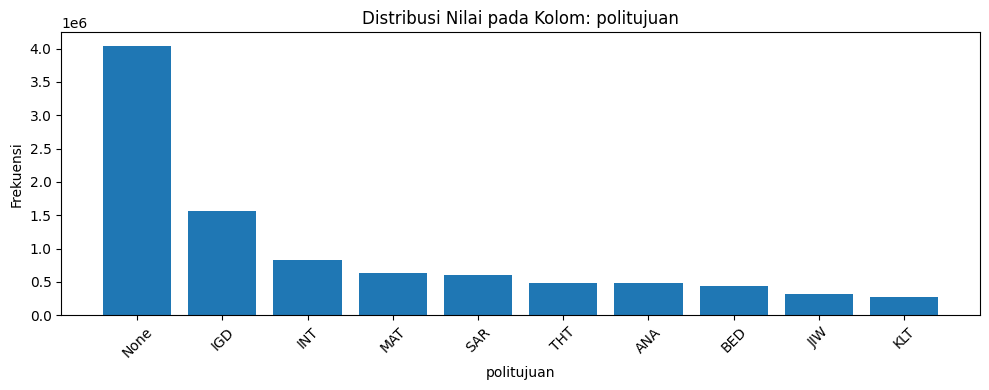


Frekuensi nilai unik di kolom: 'diagfktp'
      diagfktp  _count
0        Z09.8  407549
1        R50.9  346629
2        P03.4  207769
3        Z03.8  201969
4          K30  183908
...        ...     ...
17008   H81.10       1
17009     S623       1
17010      i67       1
17011    q65.8       1
17012    Y51.9       1

[17013 rows x 2 columns]


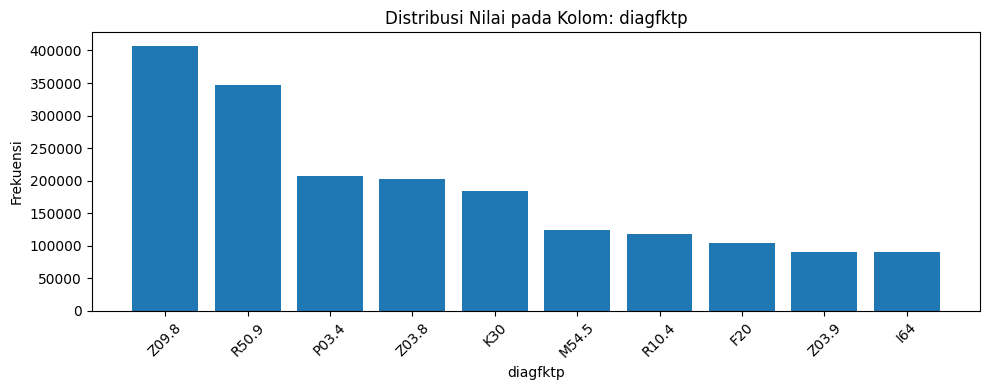


Frekuensi nilai unik di kolom: 'biaya'
             biaya  _count
0         190400.0  551038
1         183300.0  234514
2         191800.0  208009
3         185000.0  183638
4         183500.0  183463
...            ...     ...
57850    5581100.0       1
57851   10419400.0       1
57852    4377600.0       1
57853   14996800.0       1
57854  167273800.0       1

[57855 rows x 2 columns]


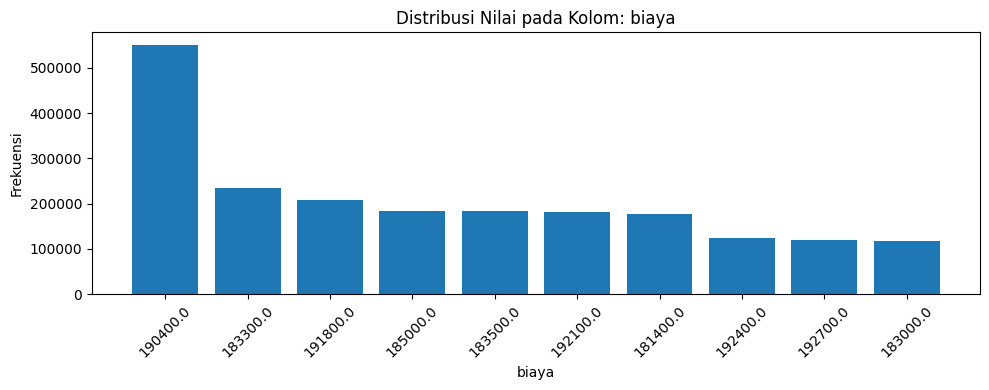


Frekuensi nilai unik di kolom: '__jenkel'
    _count
0  6160410
1  5238832


KeyError: '__jenkel'

<Figure size 1000x400 with 0 Axes>

In [37]:
%%time

import matplotlib.pyplot as plt
from vaex import agg

for col in df_selected1.column_names:
    print(f"\nFrekuensi nilai unik di kolom: '{col}'")
    
    # Group by dan hitung frekuensi
    result = df_selected1.groupby(df_selected1[col], agg.count()).sort(by='_count', ascending=False)
    
    # Konversi ke pandas untuk kemudahan visualisasi
    result_pd = result.to_pandas_df()
    
    print(result_pd)  # Cetak hasil

    # Jika terlalu banyak nilai unik, ambil 10 teratas agar grafiknya jelas
    top_n = 10
    top_result = result_pd.head(top_n)

    # Plot
    plt.figure(figsize=(10, 4))
    plt.bar(top_result[col].astype(str), top_result['_count'])
    plt.title(f'Distribusi Nilai pada Kolom: {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [38]:
df_sampling1['diagfktp'].isna().sum()


array(168, dtype=int64)

##### Mengisi Nilai Kosong

Menggunakan Nilai Peringkat 10 terbanyak: G40

In [39]:
import vaex

# Misal df adalah DataFrame vaex
df_sampling1['diagfktp'] = df_sampling1['diagfktp'].fillna('G40')


In [40]:
label_counts = df_sampling1['label'].value_counts()
label_counts

0    11242354
1      156888
dtype: int64

In [41]:
df_sampling1['diagfktp'].isna().sum()


array(0, dtype=int64)

#### Biaya

In [42]:
%%time

df_sampling1[(df_sampling1['label'] == 0) & df_sampling1['biaya'].isna()].count()


CPU times: total: 359 ms
Wall time: 181 ms


array(2745, dtype=int64)

In [43]:
%%time

df_sampling1[(df_sampling1['label'] == 1) & df_sampling1['biaya'].isna()].count()


CPU times: total: 359 ms
Wall time: 177 ms


array(55070, dtype=int64)

In [44]:
%%time

df_sampling1 = df_sampling1[~((df_sampling1['label'] == 0) & df_sampling1['biaya'].isna())]

df_sampling1['biaya'].isna().sum()



CPU times: total: 500 ms
Wall time: 286 ms


array(55070, dtype=int64)

##### Mengisi Nilai Kosong

Menggunakan Nilai Rata-rata Biaya

In [45]:
mean_biaya = df_sampling1['biaya'].mean()
mean_biaya

array(2147253.08515886)

In [46]:
import vaex

# Misal df adalah DataFrame vaex
df_sampling1['biaya'] = df_sampling1['biaya'].fillna(2147000)


In [47]:
df_sampling1['biaya'].isna().sum()


array(0, dtype=int64)

In [48]:
label_counts = df_sampling1['label'].value_counts()
label_counts

0    11239609
1      156888
dtype: int64

#### Poli Tujuan

In [49]:
%%time

df_sampling1[(df_sampling1['label'] == 0) & df_sampling1['politujuan'].isna()].count()


CPU times: total: 359 ms
Wall time: 195 ms


array(3986119, dtype=int64)

In [50]:
%%time

df_sampling1[(df_sampling1['label'] == 1) & df_sampling1['politujuan'].isna()].count()


CPU times: total: 422 ms
Wall time: 250 ms


array(53563, dtype=int64)

In [51]:
%%time

df_sampling1 = df_sampling1[~((df_sampling1['label'] == 0) & df_sampling1['politujuan'].isna())]

df_sampling1['politujuan'].isna().sum()



CPU times: total: 953 ms
Wall time: 367 ms


array(53563, dtype=int64)

##### Mengisi Nilai Kosong

Diisi dengan menggunakan nilai terbanyak Kedua: INT

In [52]:
df_sampling1['politujuan'] = df_sampling1['politujuan'].fillna('INT')


In [53]:
df_sampling1['politujuan'].isna().sum()

array(0, dtype=int64)

In [54]:
label_counts = df_sampling1['label'].value_counts()
label_counts

0    7253490
1     156888
dtype: int64

In [55]:
%%time

df_sampling1.describe()

CPU times: total: 18.2 s
Wall time: 3.98 s


,id,dati2,typefaskes,usia,jenkel,pisat,jenispel,politujuan,diagfktp,biaya,jenispulang,kelasrawat,label,durasi_rawat,cbg1,cbg2,cbg3,cbg4
data_type,int64,int64,string,int64,string,float64,int64,string,string,float64,float64,int64,int64,int64,string,int64,int64,string
count,7410378,7410378,7410378,7410378,7410378,7410378,7410378,7410378,7410378,7410378,7410378,7410378,7410378,7410378,7410378,7410378,7410378,7410378
NA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
mean,5618742.97510046,183.2213874919741,--,38.89518685821425,--,2.407883916313041,1.9927191298473572,--,--,460968.2135784436,1.0651610484647343,2.9949693524405907,0.021171389637613627,0.025095211067505598,--,4.429618030281317,31.73798259683919,--
std,3288756.816153,106.903287,--,22.063199,--,1.37603,0.085017,--,--,1221801.245488,0.443631,0.089251,0.143955,1.10309,--,1.005087,13.420505,--
min,2,1,--,0,--,1.0,1,--,--,0.0,1.0,1,0,0,--,1,1,--
max,11426957,528,--,110,--,5.0,2,--,--,309451300.0,5.0,3,1,655,--,9,84,--


#### CBG4

In [58]:
%%time

df_sampling1[(df_sampling1['label'] == 0) & (df_sampling1['cbg4'] == 'III')].count()


CPU times: total: 750 ms
Wall time: 295 ms


array(14, dtype=int64)

##### Drop Kolom CBG4

In [57]:
cbg4_counts = df_sampling1['cbg4'].value_counts()
cbg4_counts

0      7356424
I        39962
II        9514
III       4478
dtype: int64

In [59]:
%%time

df_sampling1 = df_sampling1.drop(['cbg4'])


CPU times: total: 0 ns
Wall time: 1.99 ms


#### Export Sampling 1

In [60]:
df_sampling1.export_csv("sampling2.csv")


## Pembersihan Tahap 2

Tahapan untuk mengubah jenis DiagFKTP

In [48]:
%%time

df_sampling2 = vaex.from_csv('sampling2.csv', convert=True, chunk_size=100_000)

df_sampling2

CPU times: total: 31.2 ms
Wall time: 96.3 ms


#,id,dati2,typefaskes,usia,jenkel,pisat,jenispel,politujuan,diagfktp,biaya,jenispulang,kelasrawat,label,durasi_rawat,cbg1,cbg2,cbg3
0,165666,17,KL,48,P,1.0,2,THT,L02.8,184300.0,1.0,3,0,0,Q,5,42
1,166042,17,KL,53,P,1.0,2,INT,E10.5,187300.0,1.0,3,0,0,Q,5,44
2,168937,17,KL,54,P,1.0,2,MAT,H54.2,187300.0,1.0,3,0,0,Q,5,44
3,1005899,17,A,53,P,1.0,2,SAR,M54.5,381600.0,1.0,3,0,0,Q,5,44
4,51010,8,SD,50,P,1.0,2,IGD,D61,155000.0,2.0,3,0,0,Q,5,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"7,410,373",3012230,151,SC,0,P,4.0,2,ANA,P00.9,308800.0,1.0,3,0,0,P,9,17
"7,410,374",5635918,62,C,0,L,4.0,2,IGD,J80,296700.0,4.0,3,0,0,P,9,17
"7,410,375",2555450,136,SC,0,L,4.0,2,ANA,Z03.8,253300.0,1.0,3,0,0,P,9,14
"7,410,376",4414048,223,C,6,L,4.0,2,ORT,T14.30,181400.0,1.0,3,0,0,Q,5,44


In [49]:
%%time
label_counts2 = df_sampling2['label'].value_counts()
label_counts2

CPU times: total: 250 ms
Wall time: 144 ms


0    7253490
1     156888
dtype: int64

In [50]:
print(df_sampling2.dtypes)

id                int64
dati2             int64
typefaskes       string
usia              int64
jenkel           string
pisat           float64
jenispel          int64
politujuan       string
diagfktp         string
biaya           float64
jenispulang     float64
kelasrawat        int64
label             int64
durasi_rawat      int64
cbg1             string
cbg2              int64
cbg3              int64
dtype: object


In [51]:
df_sampling2.describe()

,id,dati2,typefaskes,usia,jenkel,pisat,jenispel,politujuan,diagfktp,biaya,jenispulang,kelasrawat,label,durasi_rawat,cbg1,cbg2,cbg3
data_type,int64,int64,string,int64,string,float64,int64,string,string,float64,float64,int64,int64,int64,string,int64,int64
count,7410378,7410378,7410378,7410378,7410378,7410378,7410378,7410378,7410378,7410378,7410378,7410378,7410378,7410378,7410378,7410378,7410378
NA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
mean,5618742.97510046,183.2213874919741,--,38.89518685821425,--,2.407883916313041,1.9927191298473572,--,--,460968.2135784436,1.0651610484647343,2.9949693524405907,0.021171389637613627,0.025095211067505598,--,4.429618030281317,31.73798259683919
std,3288756.816153,106.903287,--,22.063199,--,1.37603,0.085017,--,--,1221801.245488,0.443631,0.089251,0.143955,1.10309,--,1.005087,13.420505
min,2,1,--,0,--,1.0,1,--,--,0.0,1.0,1,0,0,--,1,1
max,11426957,528,--,110,--,5.0,2,--,--,309451300.0,5.0,3,1,655,--,9,84


### Perbaikan Diagnosa FKTP

In [52]:
## Mengambil Nilai Depan DiagFKTP
# %%time

df_sampling2['diagfktp'] = df_sampling2['diagfktp'].str.split('.').apply(lambda x: x[0] if len(x) > 0 else x)

df_sampling2.head(10)


#,id,dati2,typefaskes,usia,jenkel,pisat,jenispel,politujuan,diagfktp,biaya,jenispulang,kelasrawat,label,durasi_rawat,cbg1,cbg2,cbg3
0,165666,17,KL,48,P,1,2,THT,L02,184300,1,3,0,0,Q,5,42
1,166042,17,KL,53,P,1,2,INT,E10,187300,1,3,0,0,Q,5,44
2,168937,17,KL,54,P,1,2,MAT,H54,187300,1,3,0,0,Q,5,44
3,1005899,17,A,53,P,1,2,SAR,M54,381600,1,3,0,0,Q,5,44
4,51010,8,SD,50,P,1,2,IGD,D61,155000,2,3,0,0,Q,5,33
5,49388,8,SD,50,P,1,2,IGD,D64,155000,2,3,0,0,Q,5,33
6,143197,17,KI,46,P,1,2,IGD,K30,186800,1,3,0,0,Q,5,42
7,159360,17,KL,59,L,1,2,MAT,Z01,187300,1,3,0,0,Q,5,44
8,1057379,17,B,60,L,1,2,GND,K04,211400,1,3,0,0,Q,5,12
9,170597,17,KL,47,P,1,2,MAT,H11,184300,1,3,0,0,Q,5,42


In [53]:
%%time

def classify_diag(code):
    if code is None:
        return 'Unknown'

    code = code.upper()

    prefix = code[:1]
    try:
        number = int(''.join(filter(str.isdigit, code[:3])))
    except:
        return 'Invalid'

    if 'A00' <= code[:3] <= 'B99':
        return "Certain infectious and parasitic diseases"
    elif 'C00' <= code[:3] <= 'D48':
        return "Neoplasms"
    elif 'D50' <= code[:3] <= 'D89':
        return "Diseases of the blood and immune system"
    elif 'E00' <= code[:3] <= 'E90':
        return "Endocrine, nutritional and metabolic diseases"
    elif 'F00' <= code[:3] <= 'F99':
        return "Mental and behavioural disorders"
    elif 'G00' <= code[:3] <= 'G99':
        return "Diseases of the nervous system"
    elif 'H00' <= code[:3] <= 'H59':
        return "Diseases of the eye and adnexa"
    elif 'H60' <= code[:3] <= 'H95':
        return "Diseases of the ear and mastoid process"
    elif 'I00' <= code[:3] <= 'I99':
        return "Diseases of the circulatory system"
    elif 'J00' <= code[:3] <= 'J99':
        return "Diseases of the respiratory system"
    elif 'K00' <= code[:3] <= 'K93':
        return "Diseases of the digestive system"
    elif 'L00' <= code[:3] <= 'L99':
        return "Diseases of the skin and subcutaneous tissue"
    elif 'M00' <= code[:3] <= 'M99':
        return "Diseases of the musculoskeletal system"
    elif 'N00' <= code[:3] <= 'N99':
        return "Diseases of the genitourinary system"
    elif 'O00' <= code[:3] <= 'O99':
        return "Pregnancy, childbirth and the puerperium"
    elif 'P00' <= code[:3] <= 'P96':
        return "Perinatal conditions"
    elif 'Q00' <= code[:3] <= 'Q99':
        return "Congenital malformations"
    elif 'R00' <= code[:3] <= 'R99':
        return "Symptoms, signs, and abnormal findings"
    elif 'S00' <= code[:3] <= 'T98':
        return "Injury and external causes"
    elif 'V01' <= code[:3] <= 'Y98':
        return "External causes of morbidity and mortality"
    elif 'Z00' <= code[:3] <= 'Z99':
        return "Factors influencing health status"
    elif 'U00' <= code[:3] <= 'U85':
        return "Codes for special purposes"
    else:
        return "Uncategorized"


CPU times: total: 0 ns
Wall time: 0 ns


In [54]:
%%time

df_sampling2['diagfktp'] = df_sampling2['diagfktp'].apply(classify_diag)

df_sampling2

CPU times: total: 0 ns
Wall time: 0 ns


#,id,dati2,typefaskes,usia,jenkel,pisat,jenispel,politujuan,diagfktp,biaya,jenispulang,kelasrawat,label,durasi_rawat,cbg1,cbg2,cbg3
0,165666,17,KL,48,P,1.0,2,THT,Diseases of the skin and subcutaneous tissue,184300.0,1.0,3,0,0,Q,5,42
1,166042,17,KL,53,P,1.0,2,INT,"Endocrine, nutritional and metabolic diseases",187300.0,1.0,3,0,0,Q,5,44
2,168937,17,KL,54,P,1.0,2,MAT,Diseases of the eye and adnexa,187300.0,1.0,3,0,0,Q,5,44
3,1005899,17,A,53,P,1.0,2,SAR,Diseases of the musculoskeletal system,381600.0,1.0,3,0,0,Q,5,44
4,51010,8,SD,50,P,1.0,2,IGD,Diseases of the blood and immune system,155000.0,2.0,3,0,0,Q,5,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"7,410,373",3012230,151,SC,0,P,4.0,2,ANA,Perinatal conditions,308800.0,1.0,3,0,0,P,9,17
"7,410,374",5635918,62,C,0,L,4.0,2,IGD,Diseases of the respiratory system,296700.0,4.0,3,0,0,P,9,17
"7,410,375",2555450,136,SC,0,L,4.0,2,ANA,Factors influencing health status,253300.0,1.0,3,0,0,P,9,14
"7,410,376",4414048,223,C,6,L,4.0,2,ORT,Injury and external causes,181400.0,1.0,3,0,0,Q,5,44


In [55]:
import numpy as np

# Evaluasi hasil apply ke dalam array numpy
kategori_array = df_sampling2['diagfktp'].to_numpy()

# Tambahkan sebagai kolom permanen
df_sampling2.add_column('diagfktp', kategori_array)


In [56]:
sample_value = df_sampling2['diagfktp'].values[:5][0]
print(sample_value)
print(type(sample_value))

Diseases of the skin and subcutaneous tissue
<class 'pyarrow.lib.StringScalar'>


In [57]:
df_sampling2.export_csv("sampling3.csv")  

## Pembersihan Tahap 3

Melihat Persebaran data di setiap Kolom


In [58]:
%%time

df_sampling3 = vaex.from_csv('sampling3.csv', convert=True, chunk_size=100_000)

df_sampling3

CPU times: total: 38.7 s
Wall time: 1min 16s


#,id,dati2,typefaskes,usia,jenkel,pisat,jenispel,politujuan,diagfktp,biaya,jenispulang,kelasrawat,label,durasi_rawat,cbg1,cbg2,cbg3
0,165666,17,KL,48,P,1.0,2,THT,Diseases of the skin and subcutaneous tissue,184300.0,1.0,3,0,0,Q,5,42
1,166042,17,KL,53,P,1.0,2,INT,"Endocrine, nutritional and metabolic diseases",187300.0,1.0,3,0,0,Q,5,44
2,168937,17,KL,54,P,1.0,2,MAT,Diseases of the eye and adnexa,187300.0,1.0,3,0,0,Q,5,44
3,1005899,17,A,53,P,1.0,2,SAR,Diseases of the musculoskeletal system,381600.0,1.0,3,0,0,Q,5,44
4,51010,8,SD,50,P,1.0,2,IGD,Diseases of the blood and immune system,155000.0,2.0,3,0,0,Q,5,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"7,410,373",3012230,151,SC,0,P,4.0,2,ANA,Perinatal conditions,308800.0,1.0,3,0,0,P,9,17
"7,410,374",5635918,62,C,0,L,4.0,2,IGD,Diseases of the respiratory system,296700.0,4.0,3,0,0,P,9,17
"7,410,375",2555450,136,SC,0,L,4.0,2,ANA,Factors influencing health status,253300.0,1.0,3,0,0,P,9,14
"7,410,376",4414048,223,C,6,L,4.0,2,ORT,Injury and external causes,181400.0,1.0,3,0,0,Q,5,44


In [59]:
df_sampling3.describe()

,id,dati2,typefaskes,usia,jenkel,pisat,jenispel,politujuan,diagfktp,biaya,jenispulang,kelasrawat,label,durasi_rawat,cbg1,cbg2,cbg3
data_type,int64,int64,string,int64,string,float64,int64,string,string,float64,float64,int64,int64,int64,string,int64,int64
count,7410378,7410378,7410378,7410378,7410378,7410378,7410378,7410378,7410378,7410378,7410378,7410378,7410378,7410378,7410378,7410378,7410378
NA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
mean,5618742.97510046,183.2213874919741,--,38.89518685821425,--,2.407883916313041,1.9927191298473572,--,--,460968.2135784436,1.0651610484647343,2.9949693524405907,0.021171389637613627,0.025095211067505598,--,4.429618030281317,31.73798259683919
std,3288756.816153,106.903287,--,22.063199,--,1.37603,0.085017,--,--,1221801.245488,0.443631,0.089251,0.143955,1.10309,--,1.005087,13.420505
min,2,1,--,0,--,1.0,1,--,--,0.0,1.0,1,0,0,--,1,1
max,11426957,528,--,110,--,5.0,2,--,--,309451300.0,5.0,3,1,655,--,9,84


In [60]:
%%time
label_counts = df_sampling3['label'].value_counts()
label_counts

CPU times: total: 344 ms
Wall time: 127 ms


0    7253490
1     156888
dtype: int64

#### Jumlah Unique Value setiap Kolom

In [61]:
df_selected2 = df_sampling3['dati2', 'typefaskes', 'usia', 'jenkel', 'pisat', 'jenispel', 'politujuan', 'diagfktp', 'biaya', 'jenispulang', 'kelasrawat', 'label', 'durasi_rawat', 'cbg1', 'cbg2', 'cbg3']


Frekuensi nilai unik di kolom: 'dati2'
     dati2  _count
0      113  211297
1      217  174123
2      135  145291
3       38  139670
4       90  130254
..     ...     ...
483    419     146
484    528      80
485    517      55
486    366      11
487    527       6

[488 rows x 2 columns]


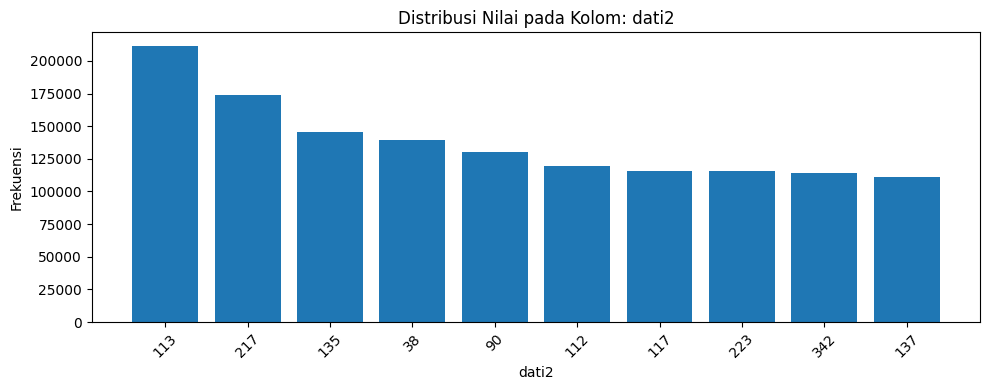


Frekuensi nilai unik di kolom: 'typefaskes'
   typefaskes   _count
0          SC  2173413
1           C  1460251
2           B  1294823
3          SB   509663
4          SD   500458
5           A   283836
6          I3   207502
7           D   179430
8          KM   170646
9          I2   159222
10         I4   111478
11         KI    83621
12         KL    82629
13         KJ    76307
14         I1    19072
15         KC    16284
16         KB    14425
17         HD    13402
18         KP    11518
19         KG    11068
20         SA    10356
21         KO     8211
22         GD     5820
23         KT     3931
24         KU     3005
25         KK        7


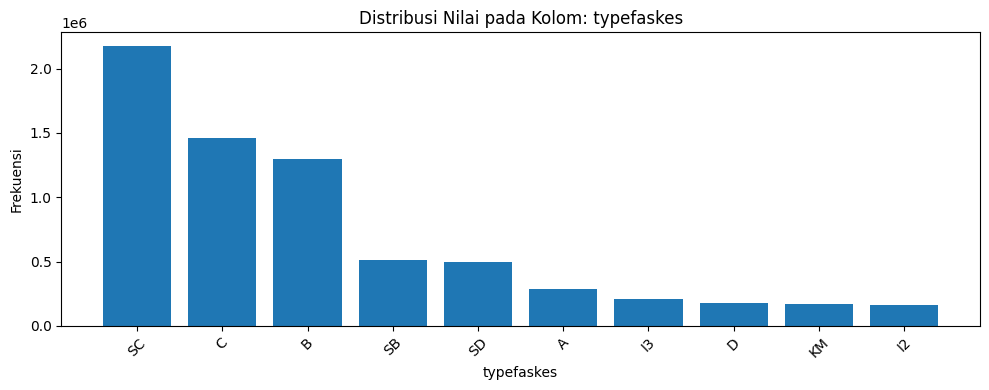


Frekuensi nilai unik di kolom: 'usia'
     usia  _count
0       0  239595
1      54  136767
2      53  135709
3      50  134450
4      55  134043
..    ...     ...
106   104       9
107   107       8
108   109       3
109   108       2
110   110       2

[111 rows x 2 columns]


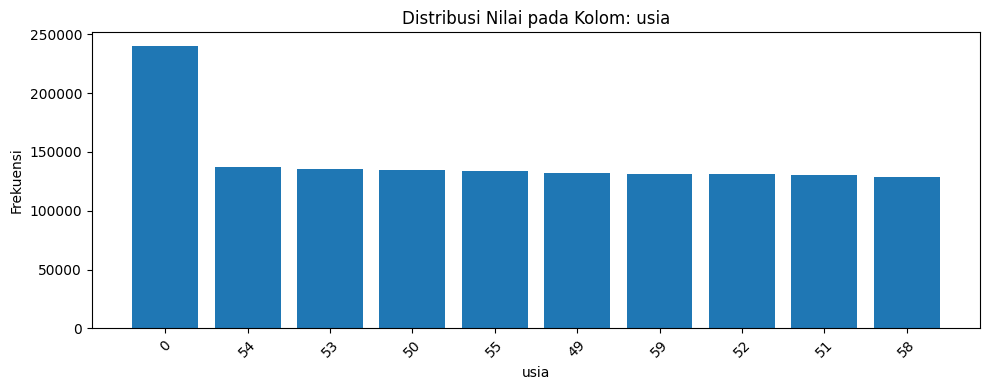


Frekuensi nilai unik di kolom: 'jenkel'
  jenkel   _count
0      P  3947238
1      L  3463140


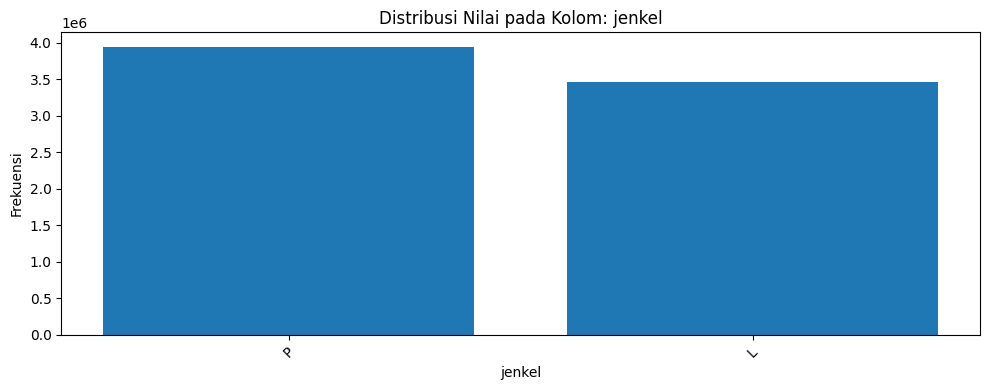


Frekuensi nilai unik di kolom: 'pisat'
   pisat   _count
0    1.0  3357119
1    4.0  1991865
2    3.0  1624183
3    5.0   257260
4    2.0   179951


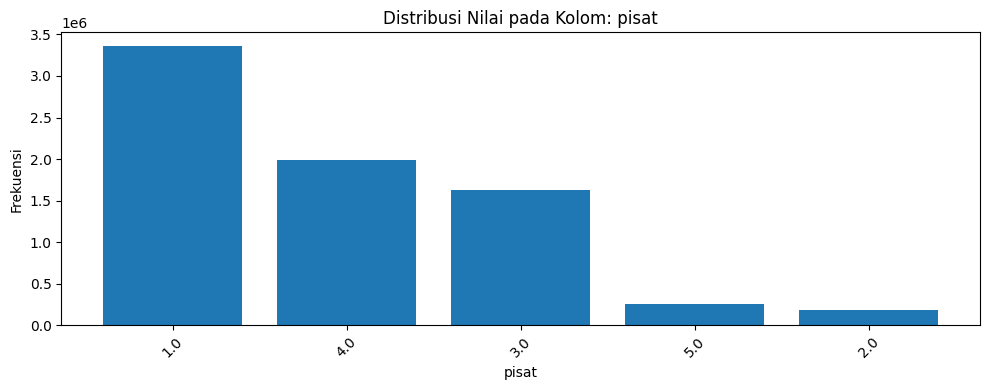


Frekuensi nilai unik di kolom: 'jenispel'
   jenispel   _count
0         2  7356424
1         1    53954


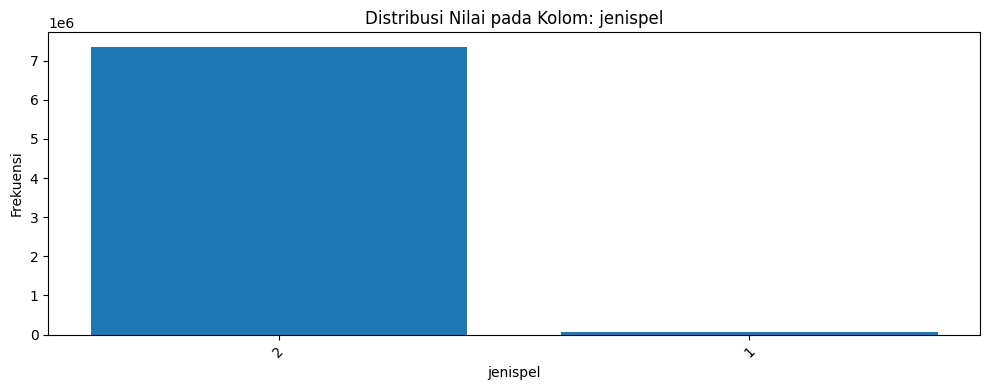


Frekuensi nilai unik di kolom: 'politujuan'
    politujuan   _count
0          IGD  1566465
1          INT   884040
2          MAT   630301
3          SAR   605654
4          THT   485198
..         ...      ...
256        BPL        1
257        SHA        1
258        PRO        1
259        ODS        1
260        RDN        1

[261 rows x 2 columns]


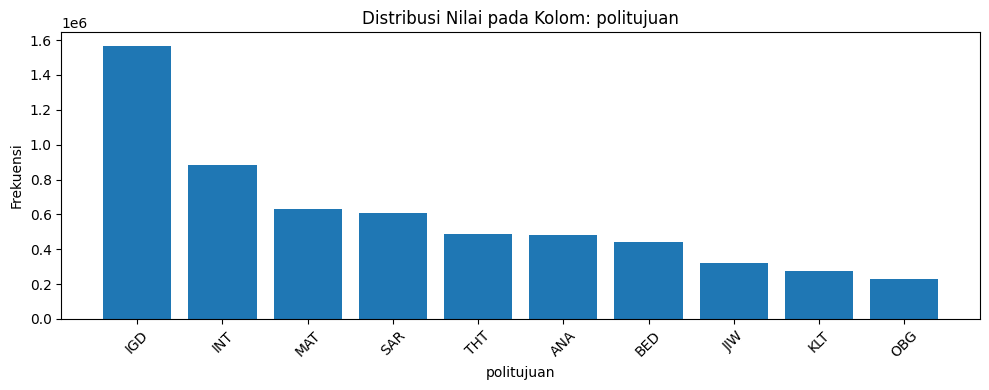


Frekuensi nilai unik di kolom: 'diagfktp'
                                         diagfktp  _count
0               Factors influencing health status  893976
1          Symptoms, signs, and abnormal findings  608969
2                  Diseases of the eye and adnexa  577239
3          Diseases of the musculoskeletal system  500462
4              Diseases of the circulatory system  455003
5                Diseases of the digestive system  440771
6         Diseases of the ear and mastoid process  418385
7            Diseases of the genitourinary system  409112
8                Mental and behavioural disorders  387311
9   Endocrine, nutritional and metabolic diseases  344947
10                     Injury and external causes  342209
11   Diseases of the skin and subcutaneous tissue  338244
12                 Diseases of the nervous system  327686
13             Diseases of the respiratory system  307857
14                                      Neoplasms  302900
15      Certain infectious an

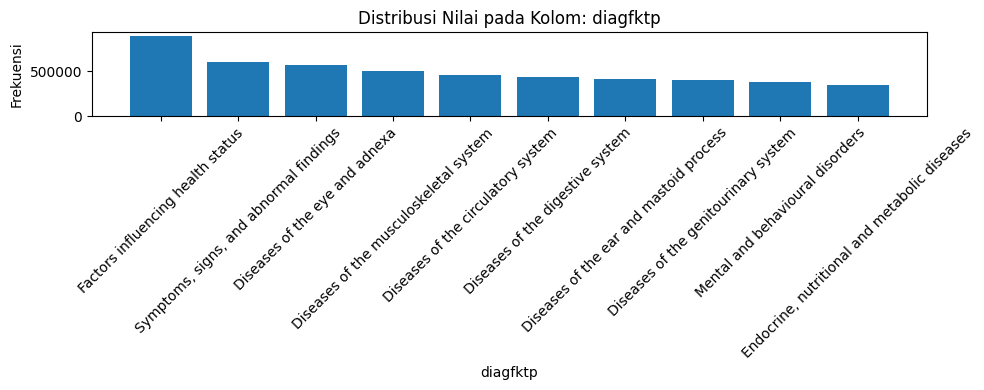


Frekuensi nilai unik di kolom: 'biaya'
            biaya  _count
0        190400.0  551029
1        183300.0  234511
2        191800.0  208001
3        185000.0  183631
4        183500.0  183458
...           ...     ...
13782   5112000.0       1
13783  10429300.0       1
13784   3126900.0       1
13785   2953300.0       1
13786   7289300.0       1

[13787 rows x 2 columns]


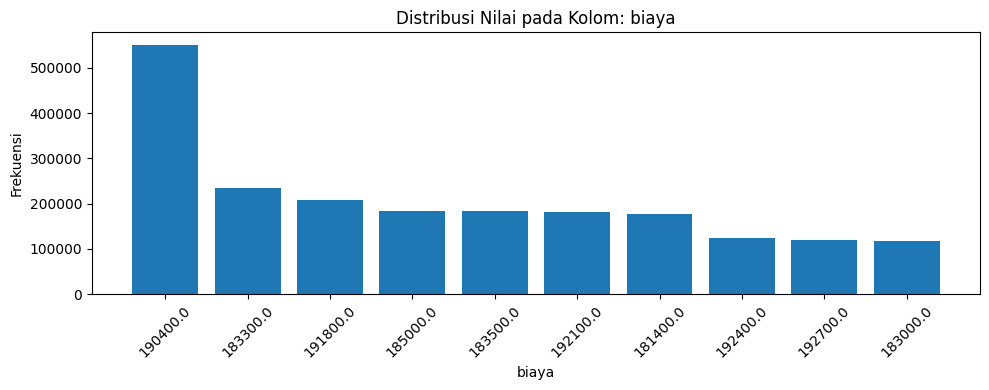


Frekuensi nilai unik di kolom: 'jenispulang'
   jenispulang   _count
0          1.0  7187542
1          2.0   128429
2          5.0    77853
3          4.0     9919
4          3.0     6635


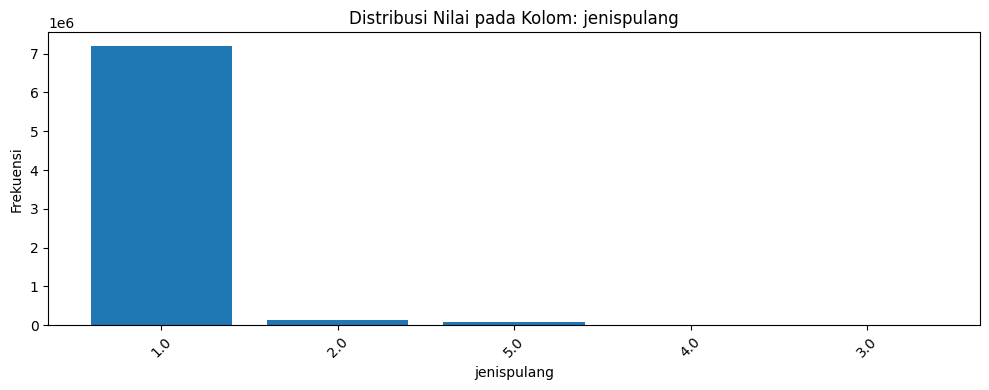


Frekuensi nilai unik di kolom: 'kelasrawat'
   kelasrawat   _count
0           3  7384068
1           2    15341
2           1    10969


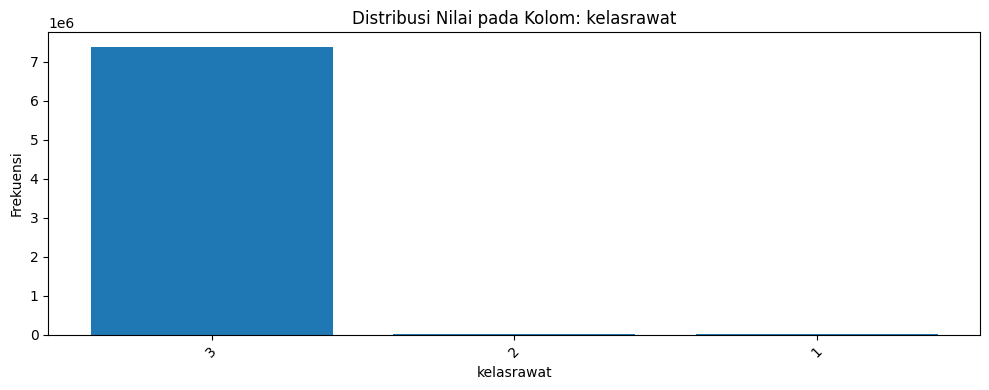


Frekuensi nilai unik di kolom: 'label'
   label   _count
0      0  7253490
1      1   156888


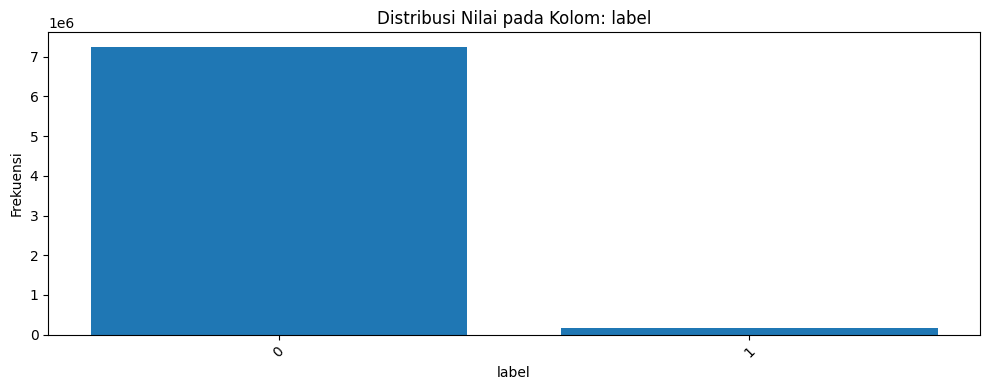


Frekuensi nilai unik di kolom: 'durasi_rawat'
     durasi_rawat   _count
0               0  7359298
1               2    16739
2               1    11125
3               3     9759
4               4     4733
..            ...      ...
123           464        1
124           184        1
125            84        1
126           327        1
127           177        1

[128 rows x 2 columns]


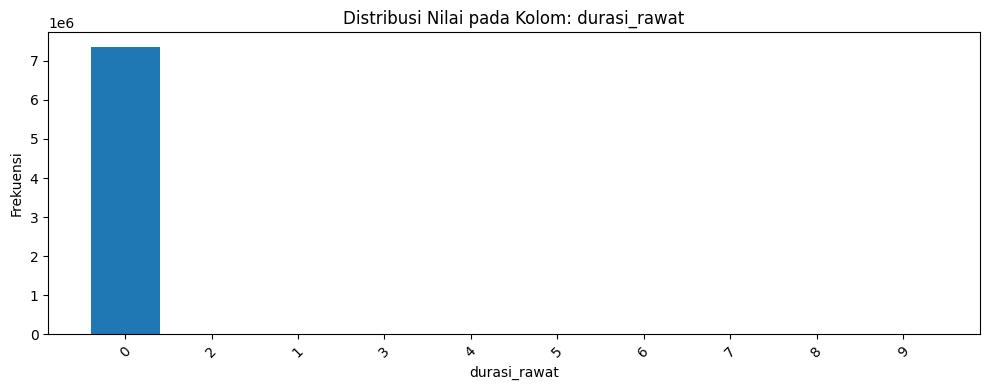


Frekuensi nilai unik di kolom: 'cbg1'
   cbg1   _count
0     Q  4513664
1     Z   572389
2     F   414938
3     U   409249
4     H   299814
5     M   213177
6     N   196428
7     K   184184
8     J   165275
9     G   129698
10    L   107460
11    D    86797
12    P    48774
13    I    44645
14    C     8002
15    W     6168
16    E     3881
17    O     2560
18    A     1593
19    V      752
20    B      698
21    S      205
22    T       27


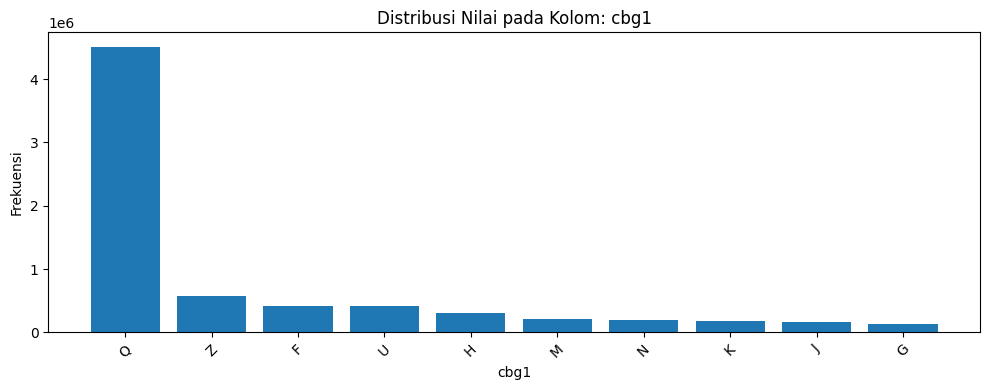


Frekuensi nilai unik di kolom: 'cbg2'
   cbg2   _count
0     5  5214287
1     3  1988723
2     2   121839
3     9    31176
4     4    24180
5     8    17598
6     1    10015
7     6     2161
8     7      399


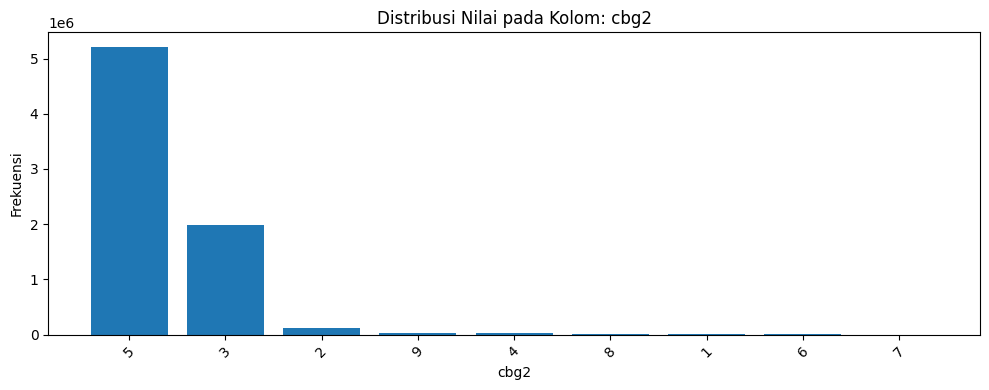


Frekuensi nilai unik di kolom: 'cbg3'
    cbg3   _count
0     44  2677990
1     42  1030066
2     12   426143
3     15   397416
4     16   374860
..   ...      ...
56    81       25
57     1       20
58    64       17
59    72       12
60    61        1

[61 rows x 2 columns]


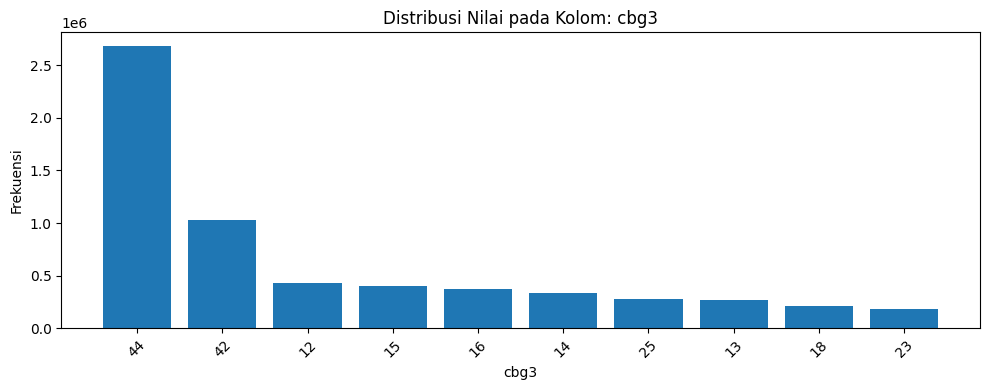

CPU times: total: 21.7 s
Wall time: 11.4 s


In [62]:
%%time

import matplotlib.pyplot as plt
from vaex import agg

for col in df_selected2.column_names:
    print(f"\nFrekuensi nilai unik di kolom: '{col}'")
    
    # Group by dan hitung frekuensi
    result = df_selected2.groupby(df_selected2[col], agg.count()).sort(by='_count', ascending=False)
    
    # Konversi ke pandas untuk kemudahan visualisasi
    result_pd = result.to_pandas_df()
    
    print(result_pd)  # Cetak hasil

    # Jika terlalu banyak nilai unik, ambil 10 teratas agar grafiknya jelas
    top_n = 10
    top_result = result_pd.head(top_n)

    # Plot
    plt.figure(figsize=(10, 4))
    plt.bar(top_result[col].astype(str), top_result['_count'])
    plt.title(f'Distribusi Nilai pada Kolom: {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


#### Melihat Persebaran Data Setiap Kolom

##### Lokasi Fasilitas Kesehatan (Dati2)

In [63]:
print('dati2' in df_sampling3.get_column_names())  # Harus True
print(df_sampling3['dati2'].isna().sum())          # Jumlah NaN
print(df_sampling3['dati2'].count())               # Jumlah nilai valid


True
0
7410378


In [64]:
print(df_sampling3['dati2'].dtype)  # Harusnya float64 atau int64

int64


In [65]:
col = 'dati2'
print(f"Distribusi kolom: {col}")
print("Mean:", df_sampling3[col].mean())
print("Min:", df_sampling3[col].min())
print("Max:", df_sampling3[col].max())
print("Standard deviation:", df_sampling3[col].std())


Distribusi kolom: dati2
Mean: 183.2213874919741
Min: 1
Max: 528
Standard deviation: 106.90328726135984


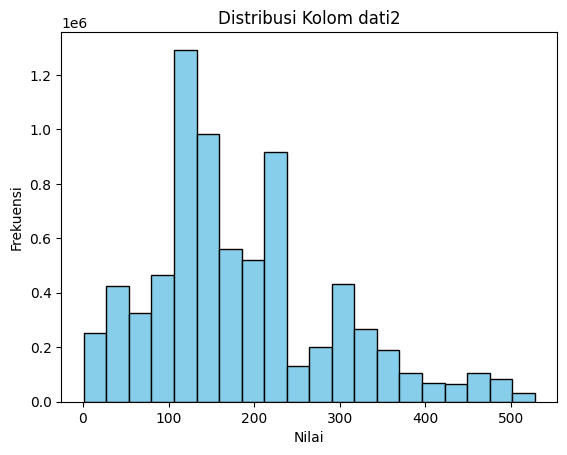

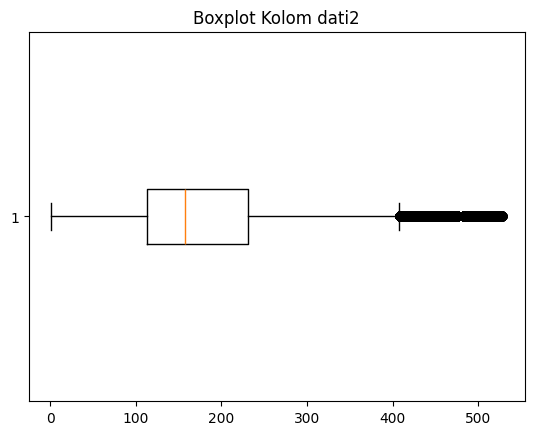

In [66]:

import matplotlib.pyplot as plt

# Histogram
plt.hist(df_sampling3['dati2'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi Kolom dati2')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.show()

# Boxplot untuk mendeteksi outlier
plt.boxplot(df_sampling3['dati2'], vert=False)
plt.title('Boxplot Kolom dati2')
plt.show()


##### Tipe Fasilitas Kesehatan (typefaskes)

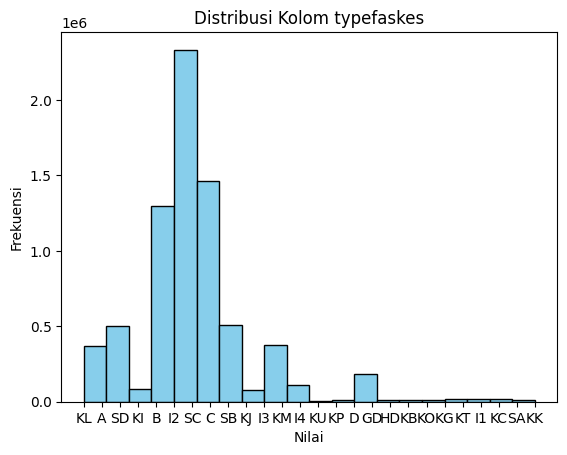

CPU times: total: 3.56 s
Wall time: 5.42 s


In [4]:
%%time
import matplotlib.pyplot as plt

# Histogram
plt.hist(df_sampling3['typefaskes'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi Kolom typefaskes')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.show()



##### Usia

In [5]:
print('usia' in df_sampling3.get_column_names()) 
print(df_sampling3['usia'].isna().sum())          
print(df_sampling3['usia'].count())            


True
0
7410378


In [6]:
print(df_sampling3['usia'].dtype) 

int64


In [7]:
col = 'usia'
print(f"Distribusi kolom: {col}")
print("Mean:", df_sampling3[col].mean())
print("Min:", df_sampling3[col].min())
print("Max:", df_sampling3[col].max())
print("Standard deviation:", df_sampling3[col].std())


Distribusi kolom: usia
Mean: 38.89518685821425
Min: 0
Max: 110
Standard deviation: 22.063199205298957


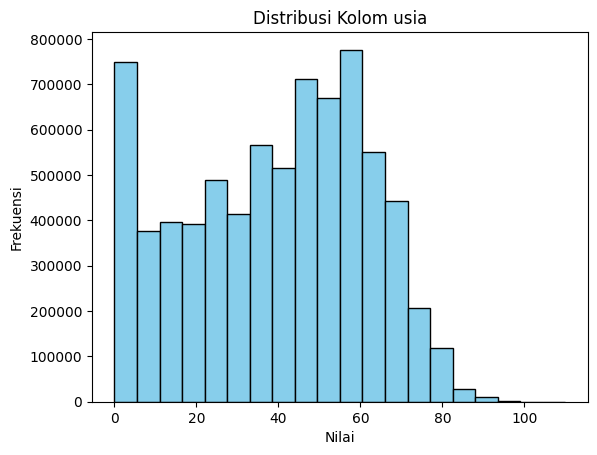

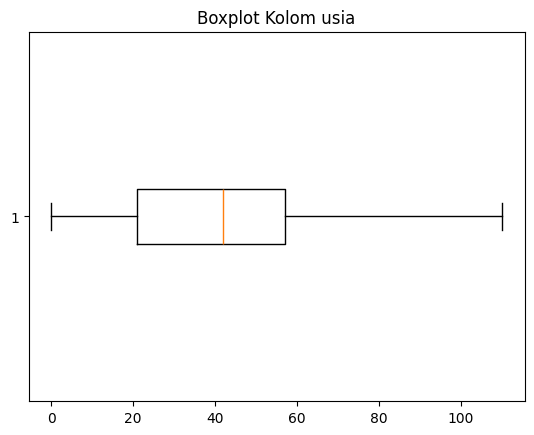

In [8]:

import matplotlib.pyplot as plt

# Histogram
plt.hist(df_sampling3['usia'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi Kolom usia')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.show()

# Boxplot untuk mendeteksi outlier
plt.boxplot(df_sampling3['usia'], vert=False)
plt.title('Boxplot Kolom usia')
plt.show()


##### Poli Tujuan (politujuan)

In [10]:
print('politujuan' in df_sampling3.get_column_names())  # Harus True
print(df_sampling3['politujuan'].isna().sum())          # Jumlah NaN
print(df_sampling3['politujuan'].count())               # Jumlah nilai valid


True
0
7410378


In [11]:
print(df_sampling3['politujuan'].dtype)  # Harusnya float64 atau int64

string


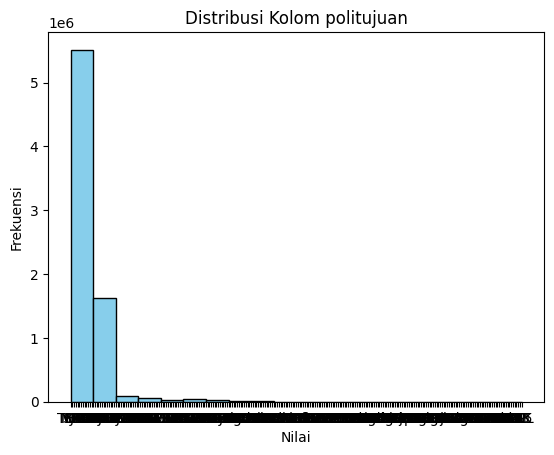

In [12]:
# Histogram
plt.hist(df_sampling3['politujuan'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi Kolom politujuan')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.show()

##### Biaya

In [13]:
col = 'biaya'
print(f"Distribusi kolom: {col}")
print("Mean:", df_sampling3[col].mean())
print("Min:", df_sampling3[col].min())
print("Max:", df_sampling3[col].max())
print("Standard deviation:", df_sampling3[col].std())


Distribusi kolom: biaya
Mean: 460968.2135784436
Min: 0.0
Max: 309451300.0
Standard deviation: 1221801.245487908


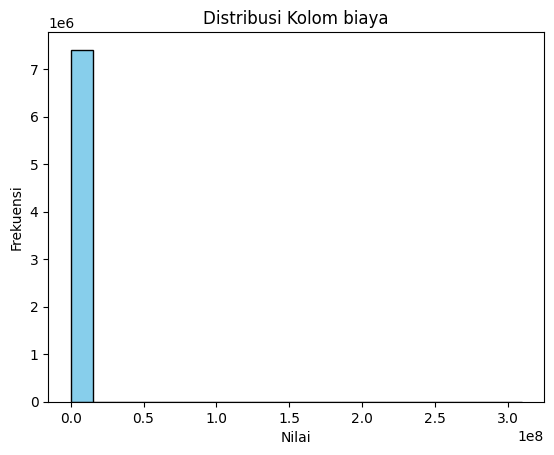

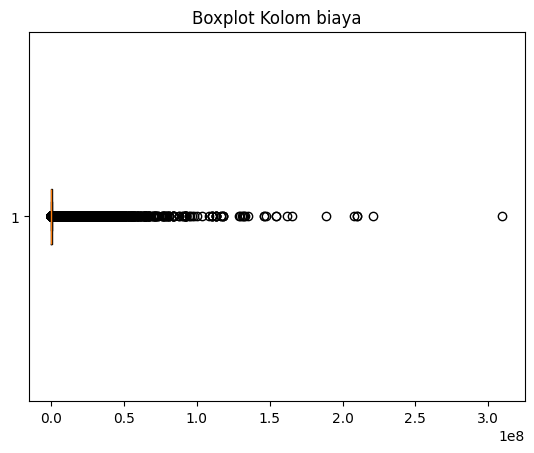

In [14]:

# Histogram
plt.hist(df_sampling3['biaya'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi Kolom biaya')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.show()

# Boxplot untuk mendeteksi outlier
plt.boxplot(df_sampling3['biaya'], vert=False)
plt.title('Boxplot Kolom biaya')
plt.show()


##### Durasi Rawat (durasi_rawat)

In [15]:
print('durasi_rawat' in df_sampling3.get_column_names())  # Harus True
print(df_sampling3['durasi_rawat'].isna().sum())          # Jumlah NaN
print(df_sampling3['durasi_rawat'].count())               # Jumlah nilai valid


True
0
7410378


In [16]:
print(df_sampling3['durasi_rawat'].dtype)

int64


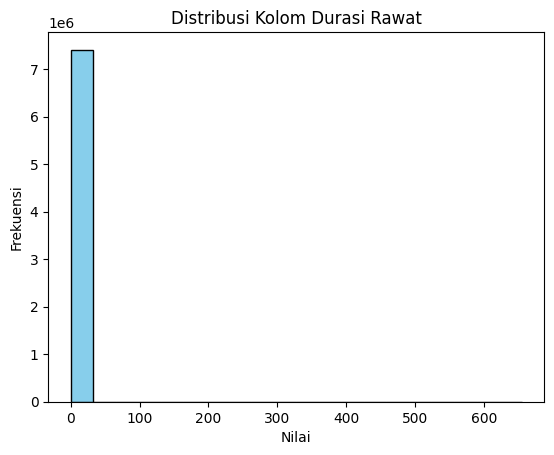

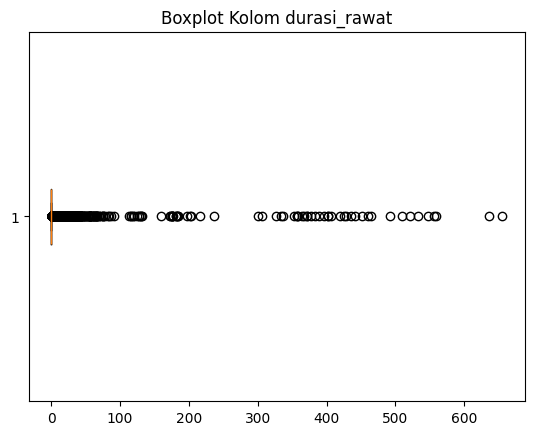

In [17]:

# Histogram
plt.hist(df_sampling3['durasi_rawat'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi Kolom Durasi Rawat')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.show()

# Boxplot untuk mendeteksi outlier
plt.boxplot(df_sampling3['durasi_rawat'], vert=False)
plt.title('Boxplot Kolom durasi_rawat')
plt.show()


##### CBG1

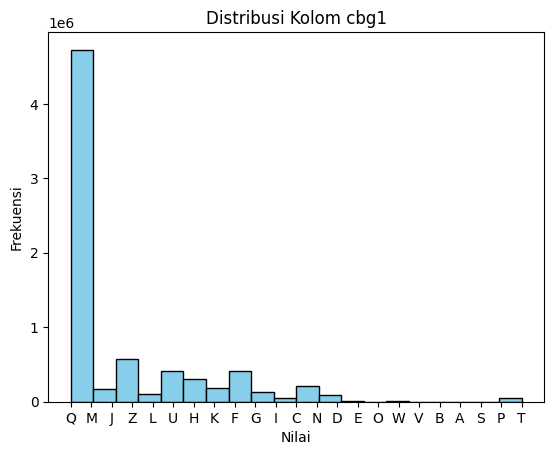

In [22]:
# Histogram
plt.hist(df_sampling3['cbg1'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi Kolom cbg1')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.show()

##### CBG2

In [23]:
col = 'cbg2'
print(f"Distribusi kolom: {col}")
print("Mean:", df_sampling3[col].mean())
print("Min:", df_sampling3[col].min())
print("Max:", df_sampling3[col].max())
print("Standard deviation:", df_sampling3[col].std())


Distribusi kolom: cbg2
Mean: 4.429618030281317
Min: 1
Max: 9
Standard deviation: 1.005086687347297


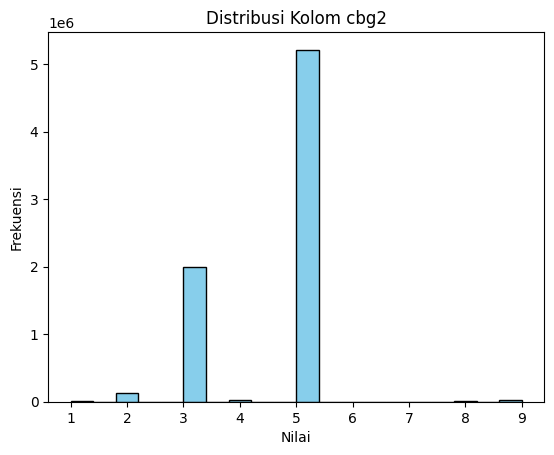

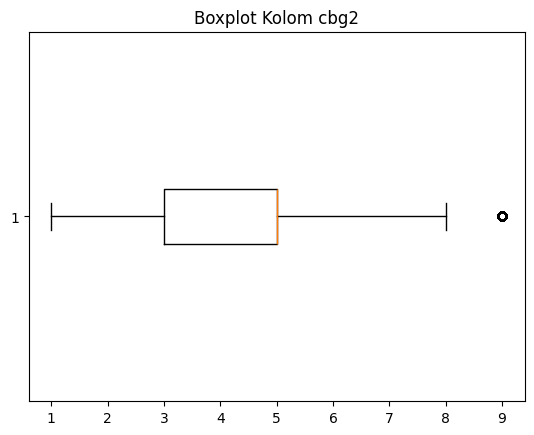

In [27]:
# Histogram
plt.hist(df_sampling3['cbg2'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi Kolom cbg2')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.show()

# Boxplot untuk mendeteksi outlier
plt.boxplot(df_sampling3['cbg2'], vert=False)
plt.title('Boxplot Kolom cbg2')
plt.show()


##### CBG3

In [41]:
print('cbg3' in df_sampling3.get_column_names())  # Harus True
print(df_sampling3['cbg3'].isna().sum())          # Jumlah NaN
print(df_sampling3['cbg3'].count())               # Jumlah nilai valid


True
0
7410378


In [ ]:
print(df_sampling3['cbg3'].dtype)  # Harusnya float64 atau int64

int64


In [47]:
col = 'cbg3'
print(f"Distribusi kolom: {col}")
print("Mean:", df_sampling3[col].mean())
print("Min:", df_sampling3[col].min())
print("Max:", df_sampling3[col].max())
print("Standard deviation:", df_sampling3[col].std())


Distribusi kolom: cbg3
Mean: 31.73798259683919
Min: 1
Max: 84
Standard deviation: 13.420504569429571


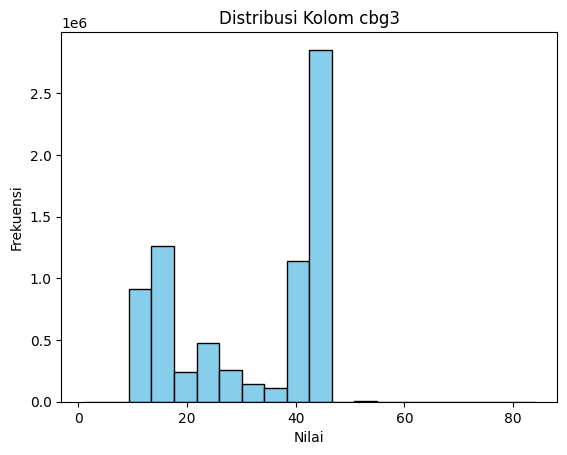

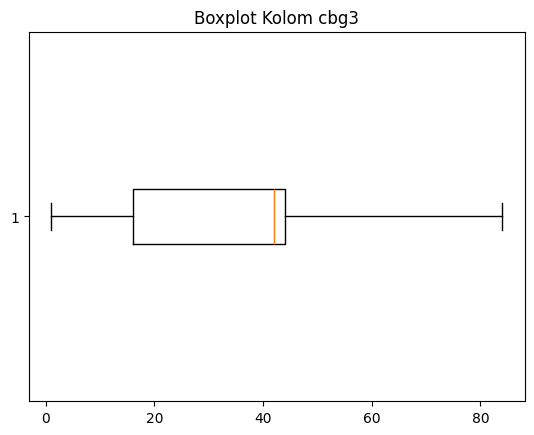

In [10]:

import matplotlib.pyplot as plt

# Histogram
plt.hist(df_sampling3['cbg3'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi Kolom cbg3')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.show()

# Boxplot untuk mendeteksi outlier
plt.boxplot(df_sampling3['cbg3'], vert=False)
plt.title('Boxplot Kolom cbg3')
plt.show()


# Diagnosa

Sampling_Healthkathon_Diagnosa, merupakan data yang berisi diagnosa penyakit peserta, di mana dalam satu
kunjungan peserta bisa memiliki lebih dari satu diagnosa. Terdiri dari 1 (satu) diagnosa primer dan atau satu atau
lebih diagnosa sekunder. Diagnosa menggunakan ICD-10: https://icd.who.int/browse10/2016/en#/

In [63]:
%%time
df_diagnosa = vaex.from_csv('sampling_healthkathon2022_diagnosa.csv', convert=True, chunk_size=100_000)
df_diagnosa

CPU times: total: 17.6 s
Wall time: 50.8 s


#,id,diag,levelid
0,6,O06.9,1
1,57,J02.9,1
2,91,R10.1,1
3,109,R18,1
4,111,N81.3,1
...,...,...,...
"17,308,531",11426947,K30,2
"17,308,532",11426947,E78.0,2
"17,308,533",11426947,I21.9,1
"17,308,534",11426952,K30,1


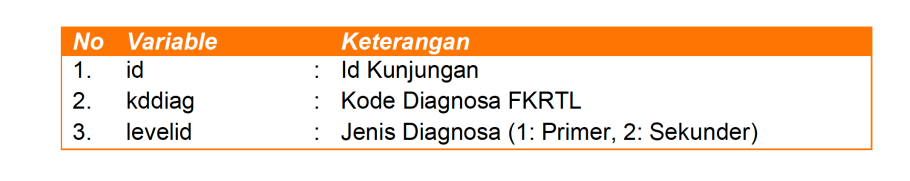

In [64]:
%%time

df_diagnosa.info()

CPU times: total: 0 ns
Wall time: 10.6 ms


In [65]:
%%time

df_diagnosa.describe()

CPU times: total: 7.23 s
Wall time: 1.15 s


,id,diag,levelid
data_type,int64,string,int64
count,17308536,17308536,17308536
NA,0,0,0
mean,5851993.047998051,--,1.3411758799242177
std,3283869.871846,--,0.474104
min,1,--,1
max,11426957,--,2


In [66]:
%%time

df_diagnosa['diag'] = df_diagnosa['diag'].str.split('.').apply(lambda x: x[0] if len(x) > 0 else x)

df_diagnosa.head(10)


CPU times: total: 0 ns
Wall time: 2.01 ms


#,id,diag,levelid
0,6,O06,1
1,57,J02,1
2,91,R10,1
3,109,R18,1
4,111,N81,1
5,111,O86,2
6,127,M54,1
7,133,K30,2
8,133,E11,1
9,135,O21,1


In [67]:
df_diagnosa['diag'].unique()


['S99',
 'N18',
 'Q66',
 'O64',
 'F03',
 'L01',
 'M84',
 'G24',
 'C64',
 'I71',
 'K28',
 'L52',
 'W02',
 'R98',
 'S59',
 'C33',
 'D09',
 'R69',
 'I40',
 'E71',
 'H67',
 'V94',
 'X27',
 'G73',
 'A79',
 'E00',
 'I25',
 'R04',
 'O34',
 'G63',
 'K05',
 'F84',
 'L91',
 'J93',
 'Z00',
 'T82',
 'W27',
 'R75',
 'C81',
 'Q50',
 'G52',
 'H95',
 'C52',
 'C23',
 'F13',
 'E65',
 'Y58',
 'B48',
 'Z84',
 'C12',
 'V48',
 'T42',
 'X37',
 'X60',
 'j44',
 'q21',
 's05',
 'W92',
 'i47',
 'P07',
 'M60',
 'S22',
 'K35',
 'S80',
 'F45',
 'W57',
 'Q28',
 'V23',
 'M20',
 'I37',
 'A60',
 'C48',
 'R45',
 'B30',
 'S13',
 'Z92',
 'G08',
 'B70',
 'Y20',
 'W66',
 'l72',
 'W39',
 'X76',
 'V70',
 'Y91',
 'I12',
 'J20',
 'F60',
 'C90',
 'H40',
 'Q12',
 'F51',
 'G83',
 'H71',
 'E23',
 'J11',
 'L22',
 'Q96',
 'G10',
 'R86',
 'T97',
 'L62',
 'A38',
 'E52',
 '37',
 'l84',
 'X84',
 'e78',
 'k21',
 'Y01',
 'n19',
 'Z50',
 'O24',
 'R14',
 'D23',
 'N21',
 'S91',
 'I88',
 'B07',
 'Q80',
 'R90',
 'Z21',
 'O15',
 'N61',
 'F29',
 

## Perubahan code diagnosa

In [ ]:
%%time

def classify_diag(code):
    if code is None:
        return 'Unknown'

    code = code.upper()
    prefix = code[:1]
    try:
        number = int(''.join(filter(str.isdigit, code[:3])))
    except:
        return 'Invalid'

    if 'A00' <= code[:3] <= 'B99':
        return "Certain infectious and parasitic diseases"
    elif 'C00' <= code[:3] <= 'D48':
        return "Neoplasms"
    elif 'D50' <= code[:3] <= 'D89':
        return "Diseases of the blood and immune system"
    elif 'E00' <= code[:3] <= 'E90':
        return "Endocrine, nutritional and metabolic diseases"
    elif 'F00' <= code[:3] <= 'F99':
        return "Mental and behavioural disorders"
    elif 'G00' <= code[:3] <= 'G99':
        return "Diseases of the nervous system"
    elif 'H00' <= code[:3] <= 'H59':
        return "Diseases of the eye and adnexa"
    elif 'H60' <= code[:3] <= 'H95':
        return "Diseases of the ear and mastoid process"
    elif 'I00' <= code[:3] <= 'I99':
        return "Diseases of the circulatory system"
    elif 'J00' <= code[:3] <= 'J99':
        return "Diseases of the respiratory system"
    elif 'K00' <= code[:3] <= 'K93':
        return "Diseases of the digestive system"
    elif 'L00' <= code[:3] <= 'L99':
        return "Diseases of the skin and subcutaneous tissue"
    elif 'M00' <= code[:3] <= 'M99':
        return "Diseases of the musculoskeletal system"
    elif 'N00' <= code[:3] <= 'N99':
        return "Diseases of the genitourinary system"
    elif 'O00' <= code[:3] <= 'O99':
        return "Pregnancy, childbirth and the puerperium"
    elif 'P00' <= code[:3] <= 'P96':
        return "Perinatal conditions"
    elif 'Q00' <= code[:3] <= 'Q99':
        return "Congenital malformations"
    elif 'R00' <= code[:3] <= 'R99':
        return "Symptoms, signs, and abnormal findings"
    elif 'S00' <= code[:3] <= 'T98':
        return "Injury and external causes"
    elif 'V01' <= code[:3] <= 'Y98':
        return "External causes of morbidity and mortality"
    elif 'Z00' <= code[:3] <= 'Z99':
        return "Factors influencing health status"
    elif 'U00' <= code[:3] <= 'U85':
        return "Codes for special purposes"
    else:
        return "Uncategorized"


In [ ]:
%%time

df_diagnosa['diag'] = df_diagnosa['diag'].apply(classify_diag)

In [70]:
%%time
df_diagnosa.head(10)


CPU times: total: 0 ns
Wall time: 0 ns


#,id,diag,levelid
0,6,"Pregnancy, childbirth and the puerperium",1
1,57,Diseases of the respiratory system,1
2,91,"Symptoms, signs, and abnormal findings",1
3,109,"Symptoms, signs, and abnormal findings",1
4,111,Diseases of the genitourinary system,1
5,111,"Pregnancy, childbirth and the puerperium",2
6,127,Diseases of the musculoskeletal system,1
7,133,Diseases of the digestive system,2
8,133,"Endocrine, nutritional and metabolic diseases",1
9,135,"Pregnancy, childbirth and the puerperium",1


## Drop Duplicate Diagnosa

In [ ]:
%%time
columns_to_check = ['id', 'diag', 'levelid']

In [72]:
%%time

all_columns = df_diagnosa.get_column_names()

CPU times: total: 0 ns
Wall time: 0 ns


In [73]:
%%time

agg_dict = {col: vaex.agg.first(col) for col in all_columns}

CPU times: total: 0 ns
Wall time: 0 ns


In [74]:
%%time

# Konversi ke Pandas
df_diag_pandas = df_diagnosa.to_pandas_df()

# Hapus duplikat
df_diag_pandas_unique = df_diag_pandas.drop_duplicates(subset=columns_to_check)

# Konversi kembali ke Vaex
df_diag_unique = vaex.from_pandas(df_diag_pandas_unique)


CPU times: total: 53.3 s
Wall time: 2min 57s


In [75]:
%%time

df_diag_unique.info()

CPU times: total: 15.6 ms
Wall time: 90 ms


In [76]:
df_diag_unique.export_csv("df_diag.csv")  

In [77]:
%%time

df_diagg = vaex.from_csv('df_diag.csv', convert=True, chunk_size=100_000)
df_diagg

CPU times: total: 21.9 s
Wall time: 42.7 s


#,id,diag,levelid
0,6,"Pregnancy, childbirth and the puerperium",1
1,57,Diseases of the respiratory system,1
2,91,"Symptoms, signs, and abnormal findings",1
3,109,"Symptoms, signs, and abnormal findings",1
4,111,Diseases of the genitourinary system,1
...,...,...,...
"16,633,677",11426947,Diseases of the digestive system,2
"16,633,678",11426947,"Endocrine, nutritional and metabolic diseases",2
"16,633,679",11426947,Diseases of the circulatory system,1
"16,633,680",11426952,Diseases of the digestive system,1



# Procedure

Sampling_Healthkathon_Procedure, berupakan data yang berisi prosedur/tindakan medis yang didapatkan peserta
JKN. Dalam setiap kunjungan, peserta bisa mendapatkan satu atau lebih prosedur/tindakan medis.
Prosedur/tindakan medis menggunakan ICD9-CM: http://www.icd9data.com/2012/Volume3/default.htm

In [78]:
%%time

df_procedure = vaex.from_csv('sampling_healthkathon2022_procedure.csv', convert=True, chunk_size=100_000)
df_procedure

CPU times: total: 8.2 s
Wall time: 37.3 s


#,id,proc
0,6,90.59
1,6,69.01
2,6,88.78
3,27,90.59
4,27,88.78
...,...,...
"12,202,866",11426915,93.57
"12,202,867",11426927,89.52
"12,202,868",11426927,96.55
"12,202,869",11426927,87.39


In [ ]:
%%time

df_procedure_pandas = pd.read_csv('sampling_healthkathon2022_procedure.csv', chunksize=100_000)
df_procedure_pandas = pd.concat(df_procedure_pandas, ignore_index=True)
df_procedure_pandas

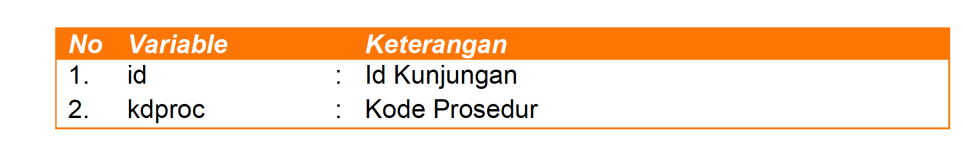

In [79]:
%%time
df_procedure.info()

CPU times: total: 0 ns
Wall time: 12.5 ms


In [ ]:
%%time

df_procedure_pandas.info()

In [80]:
df_procedure.describe()

,id,proc
data_type,int64,string
count,12202871,12202871
NA,0,0
mean,6296676.710889101,--
std,3401134.187489,--
min,1,--
max,11426953,--


In [81]:
%%time

df_procedure['proc_code'] = df_procedure['proc'].str.split('.').apply(lambda x: x[0] if len(x) > 0 else x)
# df_procedure['proc_code_detail'] = df_procedure['proc'].str.split('.').apply(lambda x: x[1] if len(x) > 0 else x)

df_procedure.head(10)


CPU times: total: 0 ns
Wall time: 2.51 ms


#,id,proc,proc_code
0,6,90.59,90
1,6,69.01,69
2,6,88.78,88
3,27,90.59,90
4,27,88.78,88
5,29,88.76,88
6,30,90.59,90
7,33,90.59,90
8,33,74,74
9,56,90.59,90


In [82]:
%%time

print(df_procedure.head(10)) 
print(df_procedure.info())  


  #    id    proc    proc_code
  0     6   90.59           90
  1     6   69.01           69
  2     6   88.78           88
  3    27   90.59           90
  4    27   88.78           88
  5    29   88.76           88
  6    30   90.59           90
  7    33   90.59           90
  8    33   74              74
  9    56   90.59           90


None
CPU times: total: 0 ns
Wall time: 261 ms


In [83]:
%%time
df_procedure['proc_code'] = df_procedure['proc_code'].evaluate() 


CPU times: total: 5.47 s
Wall time: 50 s


In [84]:
df_procedure.export_csv("df_procedure.csv")  

## Mengubah Kategori Procedure

In [2]:
df_proc = vaex.from_csv('df_procedure.csv', convert=True, chunk_size=100_000)
df_proc

#,id,proc,proc_code
0,6,90.59,90
1,6,69.01,69
2,6,88.78,88
3,27,90.59,90
4,27,88.78,88
...,...,...,...
"12,202,866",11426915,93.57,93
"12,202,867",11426927,89.52,89
"12,202,868",11426927,96.55,96
"12,202,869",11426927,87.39,87


In [3]:
df_proc = df_proc.drop('proc')

In [ ]:
df_proc['proc_code'].unique()


['61',
 '27',
 '37',
 '69',
 '98',
 '75',
 '04',
 '12',
 '45',
 '86',
 '59',
 '28',
 '90',
 '62',
 '78',
 '20',
 '51',
 '70',
 '01',
 '83',
 '32',
 '93',
 '67',
 '09',
 '42',
 '15',
 '54',
 '88',
 '39',
 'D72',
 'A24',
 '25',
 '5',
 '80',
 '31',
 'Z27',
 '77',
 '06',
 'Z37',
 '47',
 '-',
 '10',
 '57',
 'J44',
 '96',
 'O80',
 '60',
 '18',
 '26',
 '34',
 '99',
 '68',
 'S90',
 '72',
 '03',
 'M17',
 '13',
 '44',
 '85',
 '91',
 '65',
 '79',
 '23',
 '52',
 'A59',
 '71',
 '00',
 'I21',
 'Z04',
 '49',
 '82',
 '33',
 '66',
 '08',
 'P59',
 '16',
 '41',
 'Z09',
 '55',
 '94',
 'A31',
 'G62',
 '24',
 '4',
 '36',
 '74',
 '05',
 '11',
 '46',
 '87',
 '29',
 '58',
 '97',
 '63',
 'J81',
 '19',
 'G54',
 '21',
 '50',
 '35',
 '73',
 '02',
 'V58',
 'Q00',
 '84',
 '92',
 'E11',
 '64',
 '43',
 '14',
 '22',
 '53',
 '89',
 '38',
 '48',
 '81',
 '30',
 'Z24',
 '76',
 '07',
 '40',
 '17',
 '56',
 'G93',
 '95']

In [4]:
# Pastikan nilai None diubah ke string kosong agar bisa diproses
df_proc['proc_code'] = df_proc['proc_code'].fillna('')

# Hapus semua karakter selain angka
df_proc['proc_code_clean'] = df_proc['proc_code'].str.replace(r'[^0-9]', '', regex=True)

df_proc = df_proc[df_proc['proc_code_clean'] != '']

# Tampilkan hasil
print(df_proc[['proc_code', 'proc_code_clean']])


#           proc_code    proc_code_clean
0           90           90
1           69           69
2           88           88
3           90           90
4           88           88
...         ...          ...
12,120,158  93           93
12,120,159  89           89
12,120,160  96           96
12,120,161  87           87
12,120,162  93           93


In [131]:
df_proc['proc_code_clean'].unique()


['61',
 '27',
 '37',
 '69',
 '98',
 '75',
 '04',
 '45',
 '12',
 '86',
 '28',
 '59',
 '90',
 '62',
 '78',
 '51',
 '20',
 '70',
 '01',
 '83',
 '32',
 '93',
 '67',
 '09',
 '42',
 '15',
 '54',
 '39',
 '88',
 '25',
 '5',
 '80',
 '31',
 '06',
 '77',
 '47',
 '10',
 '57',
 '96',
 '60',
 '18',
 '26',
 '34',
 '99',
 '68',
 '03',
 '72',
 '13',
 '44',
 '85',
 '91',
 '65',
 '79',
 '23',
 '52',
 '71',
 '00',
 '49',
 '82',
 '33',
 '66',
 '08',
 '16',
 '41',
 '55',
 '94',
 '24',
 '4',
 '36',
 '74',
 '05',
 '46',
 '11',
 '87',
 '58',
 '29',
 '97',
 '63',
 '19',
 '21',
 '50',
 '35',
 '73',
 '02',
 '84',
 '92',
 '64',
 '43',
 '14',
 '22',
 '53',
 '89',
 '38',
 '48',
 '81',
 '30',
 '76',
 '07',
 '40',
 '17',
 '56',
 '95']

In [5]:
def categorize_prod(proc_code_clean):
    proc_code_clean = int(proc_code_clean) 
    if 0 <= proc_code_clean <= 0:
        return "Procedures And Interventions, Not Elsewhere Classified"
    elif 1 <= proc_code_clean <= 5:
        return "Operations On The Nervous System"
    elif 6 <= proc_code_clean <= 7:
        return "Operations On The Endocrine System"
    elif 8 <= proc_code_clean <= 16:
        return "Operations On The Eye"
    elif 17 <= proc_code_clean <= 17:
        return "Other Miscellaneous Diagnostic And Therapeutic Procedures"
    elif 18 <= proc_code_clean <= 20:
        return "Operations On The Ear"
    elif 21 <= proc_code_clean <= 29:
        return "Operations On The Nose, Mouth, And Pharynx"
    elif 30 <= proc_code_clean <= 34:
        return "Operations On The Respiratory System"
    elif 35 <= proc_code_clean <= 39:
        return "Operations On The Cardiovascular System"
    elif 40 <= proc_code_clean <= 41:
        return "Operations On The Hemic And Lymphatic System"
    elif 42 <= proc_code_clean <= 54:
        return "Operations On The Digestive System"
    elif 55 <= proc_code_clean <= 59:
        return "Operations On The Urinary System"
    elif 60 <= proc_code_clean <= 64:
        return "Operations On The Male Genital Organs"
    elif 65 <= proc_code_clean <= 71:
        return "Operations On The Female Genital Organs"
    elif 72 <= proc_code_clean <= 75:
        return "Obstetrical Procedures"
    elif 76 <= proc_code_clean <= 84:
        return "Operations On The Musculoskeletal System"
    elif 85 <= proc_code_clean <= 86:
        return "Operations On The Integumentary System"
    elif 87 <= proc_code_clean <= 99:
        return "Miscellaneous Diagnostic And Therapeutic Procedures"
    else:
        return "Unknown"
    return proc_code_clean

df_proc['proc_code_clean'] = df_proc['proc_code_clean'].apply(categorize_prod)

df_proc.head(20)


#,id,proc_code,proc_code_clean
0,6,90,'Miscellaneous Diagnostic And Therapeutic Proced...
1,6,69,Operations On The Female Genital Organs
2,6,88,'Miscellaneous Diagnostic And Therapeutic Proced...
3,27,90,'Miscellaneous Diagnostic And Therapeutic Proced...
4,27,88,'Miscellaneous Diagnostic And Therapeutic Proced...
...,...,...,...
15,95,86,Operations On The Integumentary System
16,95,90,'Miscellaneous Diagnostic And Therapeutic Proced...
17,96,90,'Miscellaneous Diagnostic And Therapeutic Proced...
18,103,93,'Miscellaneous Diagnostic And Therapeutic Proced...


In [133]:
df_proc

#,id,proc_code,proc_code_clean
0,6,90,'Miscellaneous Diagnostic And Therapeutic Proced...
1,6,69,Operations On The Female Genital Organs
2,6,88,'Miscellaneous Diagnostic And Therapeutic Proced...
3,27,90,'Miscellaneous Diagnostic And Therapeutic Proced...
4,27,88,'Miscellaneous Diagnostic And Therapeutic Proced...
...,...,...,...
"12,120,158",11426915,93,'Miscellaneous Diagnostic And Therapeutic Proced...
"12,120,159",11426927,89,'Miscellaneous Diagnostic And Therapeutic Proced...
"12,120,160",11426927,96,'Miscellaneous Diagnostic And Therapeutic Proced...
"12,120,161",11426927,87,'Miscellaneous Diagnostic And Therapeutic Proced...


In [6]:
df_proc = df_proc.drop('proc_code')

In [7]:
df_proc.export_csv("df_proc.csv")

## Df_Proc

In [8]:
%%time

df_proc_detail = vaex.from_csv('df_proc.csv', convert=True, chunk_size=100_000)
df_proc_detail

CPU times: total: 20.8 s
Wall time: 41.4 s


#,id,proc_code_clean
0,6,'Miscellaneous Diagnostic And Therapeutic Proced...
1,6,Operations On The Female Genital Organs
2,6,'Miscellaneous Diagnostic And Therapeutic Proced...
3,27,'Miscellaneous Diagnostic And Therapeutic Proced...
4,27,'Miscellaneous Diagnostic And Therapeutic Proced...
...,...,...
"12,120,158",11426915,'Miscellaneous Diagnostic And Therapeutic Proced...
"12,120,159",11426927,'Miscellaneous Diagnostic And Therapeutic Proced...
"12,120,160",11426927,'Miscellaneous Diagnostic And Therapeutic Proced...
"12,120,161",11426927,'Miscellaneous Diagnostic And Therapeutic Proced...


In [9]:
%%time
print(df_proc_detail.info()) 

None
CPU times: total: 62.5 ms
Wall time: 24.8 ms


In [29]:
%%time

df_proc_detail.describe()

CPU times: total: 2.64 s
Wall time: 648 ms


,id,proc_code_clean
data_type,int64,string
count,12120163,12120163
NA,0,0
mean,6295004.569171058,--
std,3405249.523927,--
min,1,--
max,11426953,--


In [30]:
%%time

df_proc_detail['proc_code_clean'].unique()


CPU times: total: 3.86 s
Wall time: 3.27 s


['Operations On The Endocrine System',
 'Operations On The Urinary System',
 'Operations On The Nervous System',
 'Operations On The Ear',
 'Other Miscellaneous Diagnostic And Therapeutic Procedures',
 'Operations On The Integumentary System',
 'Operations On The Digestive System',
 'Operations On The Male Genital Organs',
 'Operations On The Musculoskeletal System',
 'Operations On The Cardiovascular System',
 'Operations On The Nose, Mouth, And Pharynx',
 'Operations On The Respiratory System',
 'Obstetrical Procedures',
 'Procedures And Interventions, Not Elsewhere Classified',
 'Miscellaneous Diagnostic And Therapeutic Procedures',
 'Operations On The Hemic And Lymphatic System',
 'Operations On The Eye',
 'Operations On The Female Genital Organs']

In [10]:
%%time
# Pastikan kolom yang digunakan memiliki tipe data yang didukung
df_proc_detail['id'] = df_proc_detail['id'].astype('int32')
df_proc_detail['proc_code_clean'] = df_proc_detail['proc_code_clean'].astype('string')

CPU times: total: 0 ns
Wall time: 5.36 ms


In [11]:
%%time
columns_to_check = ['id', 'proc_code_clean']

CPU times: total: 0 ns
Wall time: 0 ns


In [12]:
%%time

all_columns = df_proc_detail.get_column_names()

CPU times: total: 0 ns
Wall time: 0 ns


In [13]:
%%time

agg_dict = {col: vaex.agg.first(col) for col in all_columns}

CPU times: total: 0 ns
Wall time: 0 ns


## Drop Duplicate Procedure

In [14]:
import pandas as pd

In [15]:
%%time

# Konversi ke Pandas
df_pandas = df_proc_detail.to_pandas_df()

# Hapus duplikat
df_pandas_unique = df_pandas.drop_duplicates(subset=columns_to_check)

# Konversi kembali ke Vaex
df_unique = vaex.from_pandas(df_pandas_unique)

CPU times: total: 8.39 s
Wall time: 12.9 s


In [16]:
df_unique.export('df_procc.csv')

In [17]:
grouped = df_unique.groupby(by=columns_to_check, agg='count')
duplicates = grouped[grouped['count'] > 1]

if len(duplicates) == 0:
    print("Tidak ada duplikat lagi.")
else:
    print("Masih ada duplikat.")

Tidak ada duplikat lagi.


## Df_Procc

In [18]:
%%time

df_proc_detaill = vaex.from_csv('df_procc.csv', convert=True, chunk_size=100_000)
df_proc_detaill

CPU times: total: 11.1 s
Wall time: 23.7 s


#,id,proc_code_clean
0,6,'Miscellaneous Diagnostic And Therapeutic Proced...
1,6,Operations On The Female Genital Organs
2,27,'Miscellaneous Diagnostic And Therapeutic Proced...
3,29,'Miscellaneous Diagnostic And Therapeutic Proced...
4,30,'Miscellaneous Diagnostic And Therapeutic Proced...
...,...,...
"7,314,121",11426788,'Miscellaneous Diagnostic And Therapeutic Proced...
"7,314,122",11426822,"Operations On The Nose, Mouth, And Pharynx"
"7,314,123",11426839,Operations On The Nervous System
"7,314,124",11426915,'Miscellaneous Diagnostic And Therapeutic Proced...


In [19]:
%%time
df_proc_detaill.describe()

CPU times: total: 1.5 s
Wall time: 389 ms


,id,proc_code_clean
data_type,int64,string
count,7314126,7314126
NA,0,0
mean,6009937.476780685,--
std,3349211.104976,--
min,1,--
max,11426953,--


# Gabungan Diagnosa dan Procedure

In [37]:
%%time

df_diagg = vaex.from_csv('df_diag.csv', convert=True, chunk_size=100_000)
df_diagg

CPU times: total: 31.2 ms
Wall time: 90.2 ms


#,id,diag,levelid
0,6,"Pregnancy, childbirth and the puerperium",1
1,57,Diseases of the respiratory system,1
2,91,"Symptoms, signs, and abnormal findings",1
3,109,"Symptoms, signs, and abnormal findings",1
4,111,Diseases of the genitourinary system,1
...,...,...,...
"16,633,677",11426947,Diseases of the digestive system,2
"16,633,678",11426947,"Endocrine, nutritional and metabolic diseases",2
"16,633,679",11426947,Diseases of the circulatory system,1
"16,633,680",11426952,Diseases of the digestive system,1


In [21]:
%%time

df_diagg['id'].nunique()


CPU times: total: 4.92 s
Wall time: 5.62 s


11403151

In [38]:
%%time

df_procc = vaex.from_csv('df_procc.csv', convert=True, chunk_size=100_000)
df_procc

CPU times: total: 0 ns
Wall time: 16.1 ms


#,id,proc_code_clean
0,6,'Miscellaneous Diagnostic And Therapeutic Proced...
1,6,Operations On The Female Genital Organs
2,27,'Miscellaneous Diagnostic And Therapeutic Proced...
3,29,'Miscellaneous Diagnostic And Therapeutic Proced...
4,30,'Miscellaneous Diagnostic And Therapeutic Proced...
...,...,...
"7,314,121",11426788,'Miscellaneous Diagnostic And Therapeutic Proced...
"7,314,122",11426822,"Operations On The Nose, Mouth, And Pharynx"
"7,314,123",11426839,Operations On The Nervous System
"7,314,124",11426915,'Miscellaneous Diagnostic And Therapeutic Proced...


In [23]:
%%time

df_procc['id'].nunique()

CPU times: total: 2.81 s
Wall time: 2.66 s


6372051

## Join

### Inner Join

In [26]:
df_joined_inner = df_diagg.join(df_procc, left_on='id', right_on='id', how='inner', allow_duplication=True)


In [27]:
df_joined_inner

#,id,diag,levelid,proc_code_clean
0,6,"Pregnancy, childbirth and the puerperium",1,'Miscellaneous Diagnostic And Therapeutic Proced...
1,57,Diseases of the respiratory system,1,'Miscellaneous Diagnostic And Therapeutic Proced...
2,91,"Symptoms, signs, and abnormal findings",1,'Miscellaneous Diagnostic And Therapeutic Proced...
3,109,"Symptoms, signs, and abnormal findings",1,Operations On The Digestive System
4,111,Diseases of the genitourinary system,1,'Miscellaneous Diagnostic And Therapeutic Proced...
...,...,...,...,...
"11,797,781",2860876,"Pregnancy, childbirth and the puerperium",2,Obstetrical Procedures
"11,797,782",2860876,"Pregnancy, childbirth and the puerperium",1,'Miscellaneous Diagnostic And Therapeutic Proced...
"11,797,783",2860876,"Pregnancy, childbirth and the puerperium",1,Obstetrical Procedures
"11,797,784",2860876,Factors influencing health status,2,'Miscellaneous Diagnostic And Therapeutic Proced...


In [28]:
df_joined_inner.describe()

,id,diag,levelid,proc_code_clean
data_type,int64,string,int64,string
count,11797786,11797786,11797786,11797786
NA,0,0,0,0
mean,6121753.182372608,--,1.3800371527335722,--
std,3325841.539066,--,0.485396,--
min,1,--,1,--
max,11426953,--,2,--


### Left Join

In [31]:
%%time

df_joined_left = df_diagg.join(df_procc, left_on='id', right_on='id', how='left', allow_duplication=True)


CPU times: total: 10.9 s
Wall time: 3.28 s


In [32]:
df_joined_left.describe()

,id,diag,levelid,proc_code_clean
data_type,int64,string,int64,string
count,18562625,18562625,18562625,11797786
NA,0,0,0,6764839
mean,5895714.318841489,--,1.3349366266893825,--
std,3298396.976522,--,0.471968,--
min,1,--,1,--
max,11426957,--,2,--


### Right Join

In [39]:
%%time

df_joined_right = df_diagg.join(df_procc, left_on='id', right_on='id', how='right', allow_duplication=True)


CPU times: total: 20.1 s
Wall time: 8.43 s


In [40]:
%%time

df_joined_right.describe()

CPU times: total: 4.34 s
Wall time: 3.72 s


,id,proc_code_clean,diag,levelid
data_type,int64,string,string,int64
count,11797786,11797786,11797786,11797786
NA,0,0,0,0
mean,6121753.182372608,--,--,1.3800371527335722
std,3325841.539065,--,--,0.485396
min,1,--,--,1
max,11426953,--,--,2


In [43]:
%%time

df_joined_left.export_csv("JoinDiagProd.csv")  

CPU times: total: 39.4 s
Wall time: 1min 51s


## Pengolahan Join

In [45]:
%%time

df_diagprod = vaex.from_csv('JoinDiagProd.csv', convert=True, chunk_size=100_000)
df_diagprod

CPU times: total: 0 ns
Wall time: 62.7 ms


#,id,diag,levelid,proc_code_clean
0,6,"Pregnancy, childbirth and the puerperium",1,'Miscellaneous Diagnostic And Therapeutic Proced...
1,57,Diseases of the respiratory system,1,'Miscellaneous Diagnostic And Therapeutic Proced...
2,91,"Symptoms, signs, and abnormal findings",1,'Miscellaneous Diagnostic And Therapeutic Proced...
3,109,"Symptoms, signs, and abnormal findings",1,Operations On The Digestive System
4,111,Diseases of the genitourinary system,1,'Miscellaneous Diagnostic And Therapeutic Proced...
...,...,...,...,...
"18,562,620",2860876,"Pregnancy, childbirth and the puerperium",2,Obstetrical Procedures
"18,562,621",2860876,"Pregnancy, childbirth and the puerperium",1,'Miscellaneous Diagnostic And Therapeutic Proced...
"18,562,622",2860876,"Pregnancy, childbirth and the puerperium",1,Obstetrical Procedures
"18,562,623",2860876,Factors influencing health status,2,'Miscellaneous Diagnostic And Therapeutic Proced...


In [ ]:
df_diagprod.describe()

## Untuk Pengolahan Data Yang Kosong akan diolah ketika sudah digabungkan dengan dataset labal

,id,diag,levelid,proc_code_clean
data_type,int64,string,int64,string
count,18562625,18562625,18562625,11797786
NA,0,0,0,6764839
mean,5895714.318841489,--,1.3349366266893825,--
std,3298396.976522,--,0.471968,--
min,1,--,1,--
max,11426957,--,2,--


# Gabungan Ketiga Tabel

In [67]:
%%time

df_sampling3 = vaex.from_csv('sampling3.csv', convert=True, chunk_size=100_000)
df_sampling3

CPU times: total: 15.6 ms
Wall time: 109 ms


#,id,dati2,typefaskes,usia,jenkel,pisat,jenispel,politujuan,diagfktp,biaya,jenispulang,kelasrawat,label,durasi_rawat,cbg1,cbg2,cbg3
0,165666,17,KL,48,P,1.0,2,THT,Diseases of the skin and subcutaneous tissue,184300.0,1.0,3,0,0,Q,5,42
1,166042,17,KL,53,P,1.0,2,INT,"Endocrine, nutritional and metabolic diseases",187300.0,1.0,3,0,0,Q,5,44
2,168937,17,KL,54,P,1.0,2,MAT,Diseases of the eye and adnexa,187300.0,1.0,3,0,0,Q,5,44
3,1005899,17,A,53,P,1.0,2,SAR,Diseases of the musculoskeletal system,381600.0,1.0,3,0,0,Q,5,44
4,51010,8,SD,50,P,1.0,2,IGD,Diseases of the blood and immune system,155000.0,2.0,3,0,0,Q,5,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"7,410,373",3012230,151,SC,0,P,4.0,2,ANA,Perinatal conditions,308800.0,1.0,3,0,0,P,9,17
"7,410,374",5635918,62,C,0,L,4.0,2,IGD,Diseases of the respiratory system,296700.0,4.0,3,0,0,P,9,17
"7,410,375",2555450,136,SC,0,L,4.0,2,ANA,Factors influencing health status,253300.0,1.0,3,0,0,P,9,14
"7,410,376",4414048,223,C,6,L,4.0,2,ORT,Injury and external causes,181400.0,1.0,3,0,0,Q,5,44


In [68]:
df_sampling3.info()

column,type,unit,description,expression
id,int64,,,
dati2,int64,,,
typefaskes,str,,,
usia,int64,,,
jenkel,str,,,
pisat,float64,,,
jenispel,int64,,,
politujuan,str,,,
diagfktp,str,,,
biaya,float64,,,


In [69]:
df_diagprod['diag'].unique()

['Codes for special purposes',
 'Endocrine, nutritional and metabolic diseases',
 'External causes of morbidity and mortality',
 'Diseases of the respiratory system',
 'Neoplasms',
 'Diseases of the circulatory system',
 'Mental and behavioural disorders',
 'Uncategorized',
 'Pregnancy, childbirth and the puerperium',
 'Diseases of the musculoskeletal system',
 'Injury and external causes',
 'Perinatal conditions',
 'Certain infectious and parasitic diseases',
 'Diseases of the nervous system',
 'Diseases of the ear and mastoid process',
 'Diseases of the skin and subcutaneous tissue',
 'Factors influencing health status',
 'Diseases of the genitourinary system',
 'Symptoms, signs, and abnormal findings',
 'Diseases of the eye and adnexa',
 'Diseases of the digestive system',
 'Congenital malformations',
 'Diseases of the blood and immune system']

In [70]:
df_diagprod.info()

column,type,unit,description,expression
id,int64,,,
diag,str,,,
levelid,int64,,,
proc_code_clean,str,,,
#,id,diag,levelid,proc_code_clean
0,6,"Pregnancy, childbirth and the puerperium",1,'Miscellaneous Diagnostic And Therapeutic Proced...
1,57,Diseases of the respiratory system,1,'Miscellaneous Diagnostic And Therapeutic Proced...
2,91,"Symptoms, signs, and abnormal findings",1,'Miscellaneous Diagnostic And Therapeutic Proced...
3,109,"Symptoms, signs, and abnormal findings",1,Operations On The Digestive System
4,111,Diseases of the genitourinary system,1,'Miscellaneous Diagnostic And Therapeutic Proced...


## Join

### Left Join

In [71]:
%%time

df_joined = df_sampling3.join(df_diagprod, left_on='id', right_on='id', how='left', allow_duplication=True)


CPU times: total: 23.7 s
Wall time: 12 s


In [72]:
df_joined.info()

column,type,unit,description,expression
id,int64,,,
dati2,int64,,,
typefaskes,str,,,
usia,int64,,,
jenkel,str,,,
pisat,float64,,,
jenispel,int64,,,
politujuan,str,,,
diagfktp,str,,,
biaya,float64,,,


In [73]:
df_joined.describe()

,id,dati2,typefaskes,usia,jenkel,pisat,jenispel,politujuan,diagfktp,biaya,jenispulang,kelasrawat,label,durasi_rawat,cbg1,cbg2,cbg3,diag,levelid,proc_code_clean
data_type,int64,int64,string,int64,string,float64,int64,string,string,float64,float64,int64,int64,int64,string,int64,int64,string,int64,string
count,9694498,9694498,9694498,9694498,9694498,9694498,9694498,9694498,9694498,9694498,9694498,9694498,9694498,9694498,9694498,9694498,9694498,9678306,9678306,4661257
NA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16192,16192,5033241
mean,5669657.464585273,183.01691670883835,--,40.386917507229356,--,2.3663778155403197,1.988676360550077,--,--,490994.8447393563,1.0702532508645626,2.9923355495044714,0.025097637856029264,0.04467173029485384,--,4.406321296884068,31.777484300889018,--,1.2193323914329637,--
std,3281307.423359,105.621825,--,22.077941,--,1.366217,0.105808,--,--,1682217.07817,0.462286,0.110646,0.156422,1.246833,--,1.02409,13.518591,--,0.413794,--
min,2,1,--,0,--,1.0,1,--,--,0.0,1.0,1,0,0,--,1,1,--,1,--
max,11426957,528,--,110,--,5.0,2,--,--,309451300.0,5.0,3,1,655,--,9,84,--,2,--


In [74]:
df_joined.export_csv("datagabungan.csv")

# Pengolahan Data Gabungan

In [75]:
%%time

df_gabungan = vaex.from_csv('datagabungan.csv', convert=True, chunk_size=100_000)

CPU times: total: 1min 19s
Wall time: 3min 12s


In [76]:
df_gabungan

#,id,dati2,typefaskes,usia,jenkel,pisat,jenispel,politujuan,diagfktp,biaya,jenispulang,kelasrawat,label,durasi_rawat,cbg1,cbg2,cbg3,diag,levelid,proc_code_clean
0,165666,17,KL,48,P,1.0,2,THT,Diseases of the skin and subcutaneous tissue,184300.0,1.0,3,0,0,Q,5,42,Diseases of the ear and mastoid process,1.0,--
1,166042,17,KL,53,P,1.0,2,INT,"Endocrine, nutritional and metabolic diseases",187300.0,1.0,3,0,0,Q,5,44,Diseases of the digestive system,2.0,--
2,168937,17,KL,54,P,1.0,2,MAT,Diseases of the eye and adnexa,187300.0,1.0,3,0,0,Q,5,44,Diseases of the eye and adnexa,2.0,--
3,1005899,17,A,53,P,1.0,2,SAR,Diseases of the musculoskeletal system,381600.0,1.0,3,0,0,Q,5,44,Diseases of the musculoskeletal system,1.0,--
4,51010,8,SD,50,P,1.0,2,IGD,Diseases of the blood and immune system,155000.0,2.0,3,0,0,Q,5,33,Diseases of the blood and immune system,1.0,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"9,694,493",803711,82,C,46,P,3.0,2,MAT,Diseases of the eye and adnexa,192700.0,1.0,3,0,0,Q,5,44,Diseases of the eye and adnexa,1.0,--
"9,694,494",795501,82,SC,48,L,2.0,2,INT,Factors influencing health status,192700.0,1.0,3,0,0,Q,5,44,Factors influencing health status,1.0,--
"9,694,495",788552,82,C,45,L,2.0,2,INT,"Endocrine, nutritional and metabolic diseases",183500.0,1.0,3,0,0,Q,5,44,Diseases of the circulatory system,2.0,--
"9,694,496",792428,82,C,45,L,2.0,2,INT,"Endocrine, nutritional and metabolic diseases",183500.0,1.0,3,0,0,Q,5,44,Diseases of the circulatory system,2.0,--


## Menghitung Nilai Entropy Setiap Kolom

In [77]:
def entropy(df_gabungan, column):
    counts = df_gabungan[column].value_counts()
    total = counts.sum().item()
    probs = counts / total
    entropy = -np.sum(probs * np.log2(probs))
    return entropy

In [78]:
label_counts = df_gabungan['label'].value_counts()
label_counts

0    9451189
1     243309
dtype: int64

### Kolom Kategorikal

In [79]:
%%time 
categorical_columns = [col for col in df_gabungan.get_column_names() if df_gabungan[col].dtype == 'string']

for col in categorical_columns:
    ent = entropy(df_gabungan, col)
    print(f'Entropy kolom {col}: {ent:.4f}')


Entropy kolom typefaskes: 3.1055
Entropy kolom jenkel: 0.9961
Entropy kolom politujuan: 4.0096
Entropy kolom diagfktp: 4.1193
Entropy kolom cbg1: 2.3338
Entropy kolom diag: 4.2310
Entropy kolom proc_code_clean: 1.5795
CPU times: total: 25.1 s
Wall time: 3.42 s
